In [ ]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 104.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6256d0a2d3e2e9f2fe372ef06e0767844a7a83c2ead4d6d8c65628db15727494
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno

In [ ]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

#Data Preprocessing

In [ ]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

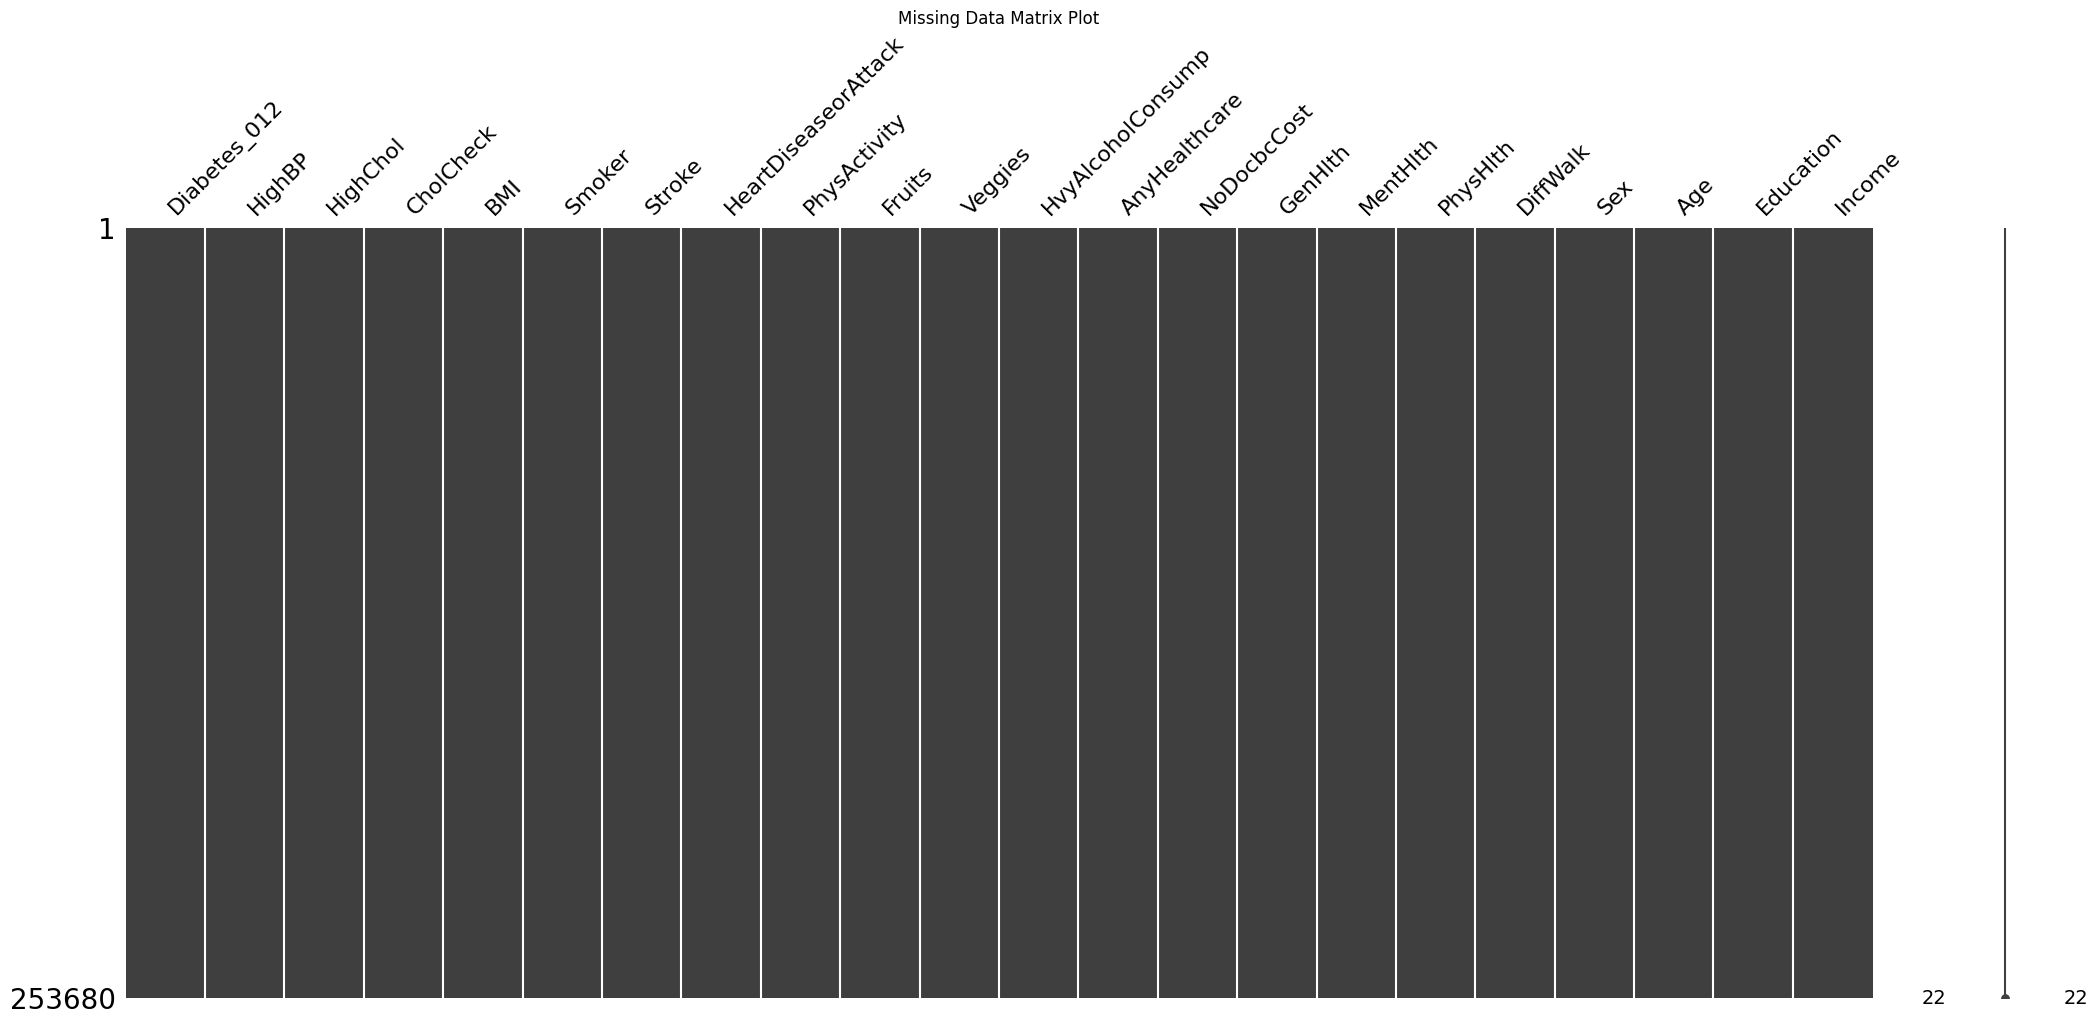

In [ ]:
msno.matrix(df)
plt.title('Missing Data Matrix Plot')
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(23899)

In [ ]:
duplicates = df[df.duplicated(keep=False)]
duplicates

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5                0.0     1.0       1.0        1.0  25.0     1.0     0.0   
25               0.0     0.0       0.0        1.0  32.0     0.0     0.0   
29               0.0     0.0       1.0        1.0  31.0     1.0     0.0   
44               0.0     0.0       1.0        1.0  31.0     1.0     0.0   
52               2.0     1.0       1.0        1.0  27.0     1.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253492           2.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563           0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
5                        0.0           1.0     1.0  ...            1.0   
25                       0.0           1.0     1.0  ...            1.0   
29                       0.0           1.0     1.0  ...            1.0   
44                       0.0           0.0     1.0  ...            1.0   
52                       0.0           0.0     0.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253492                   0.0           1.0     1.0  ...            1.0   
253550                   0.0           1.0     1.0  ...            1.0   
253563                   0.0           1.0     1.0  ...            1.0   
253597                   0.0           1.0     1.0  ...            1.0   
253638                   0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
5               0.0      2.0       0.0       2.0       0.0  1.0  10.0   
25              0.0      2.0       0.0       0.0       0.0  0.0   5.0   
29              0.0      1.0       0.0       0.0       0.0  1.0  12.0   
44              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
52              0.0      5.0       0.0      30.0       1.0  0.0  10.0   
...             ...      ...       ...       ...       ...  ...   ...   
253492          0.0      3.0       0.0       0.0       0.0  1.0   9.0   
253550          0.0      1.0       0.0       0.0       0.0  0.0   7.0   
253563          0.0      2.0       0.0       0.0       0.0  1.0   8.0   
253597          0.0      2.0       0.0       0.0       0.0  0.0   5.0   
253638          0.0      2.0       0.0       0.0       0.0  1.0   1.0   

        Education  Income  
5             6.0     8.0  
25            6.0     8.0  
29            6.0     8.0  
44            5.0     8.0  
52            4.0     5.0  
...           ...     ...  
253492        6.0     6.0  
253550        6.0     8.0  
253563        6.0     8.0  
253597        6.0     8.0  
253638        4.0     6.0  

[35086 rows x 22 columns]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

In [ ]:
x=df.drop('Diabetes_012',axis=1)
y=df['Diabetes_012']

In [ ]:
y[y == 2] = 1

y.value_counts()

Diabetes_012
0.0    190055
1.0     39726
Name: count, dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                229781 non-null  float64
 1   HighChol              229781 non-null  float64
 2   CholCheck             229781 non-null  float64
 3   BMI                   229781 non-null  float64
 4   Smoker                229781 non-null  float64
 5   Stroke                229781 non-null  float64
 6   HeartDiseaseorAttack  229781 non-null  float64
 7   PhysActivity          229781 non-null  float64
 8   Fruits                229781 non-null  float64
 9   Veggies               229781 non-null  float64
 10  HvyAlcoholConsump     229781 non-null  float64
 11  AnyHealthcare         229781 non-null  float64
 12  NoDocbcCost           229781 non-null  float64
 13  GenHlth               229781 non-null  float64
 14  MentHlth              229781 non-null  float64
 15  PhysH

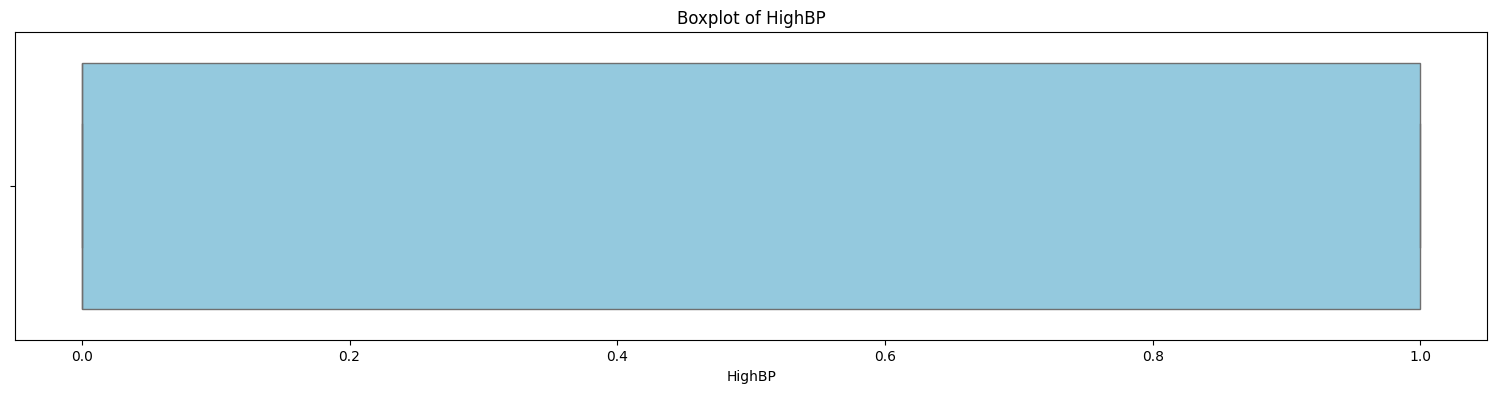

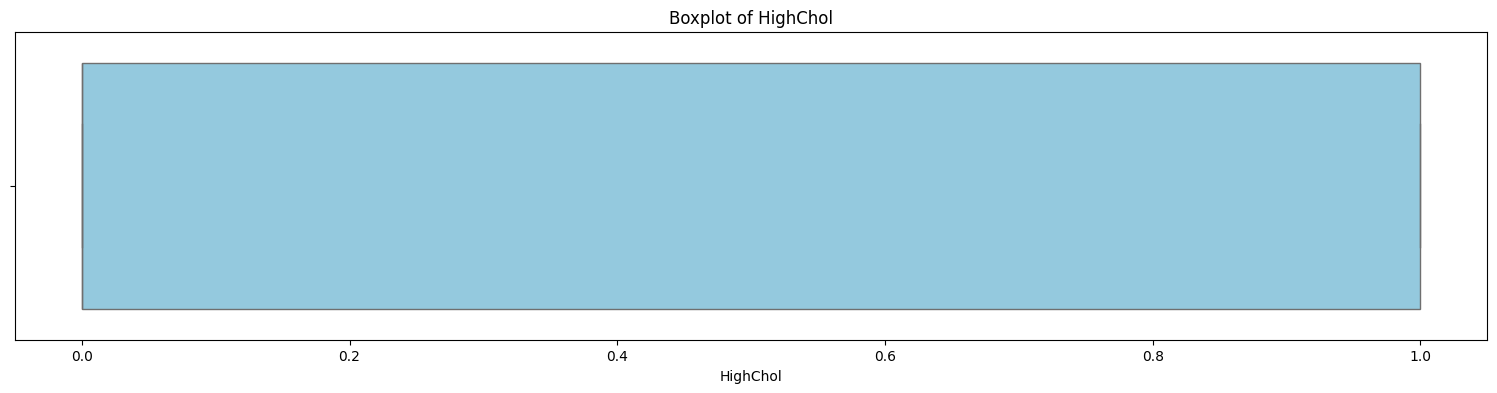

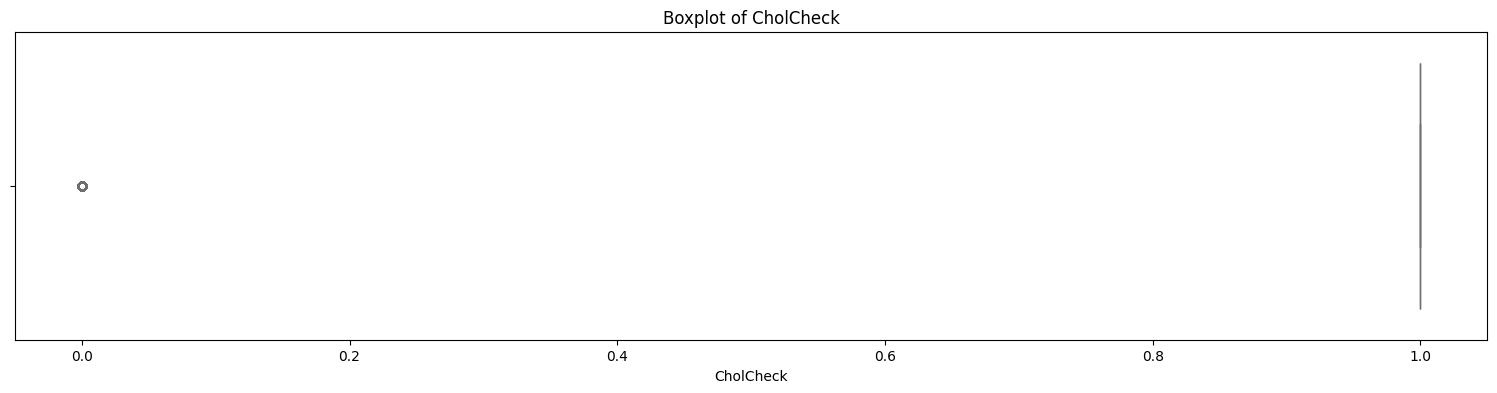

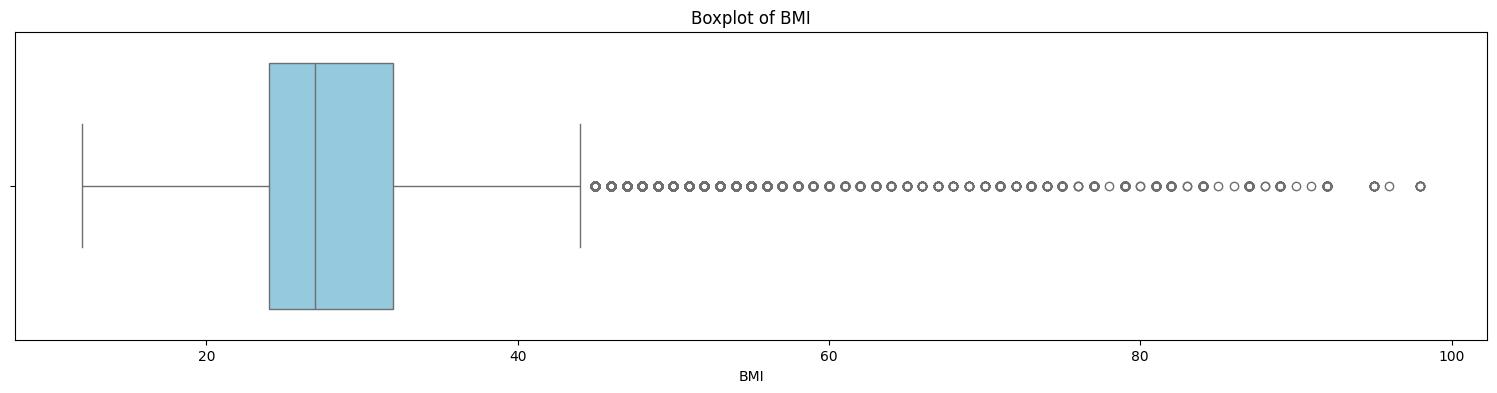

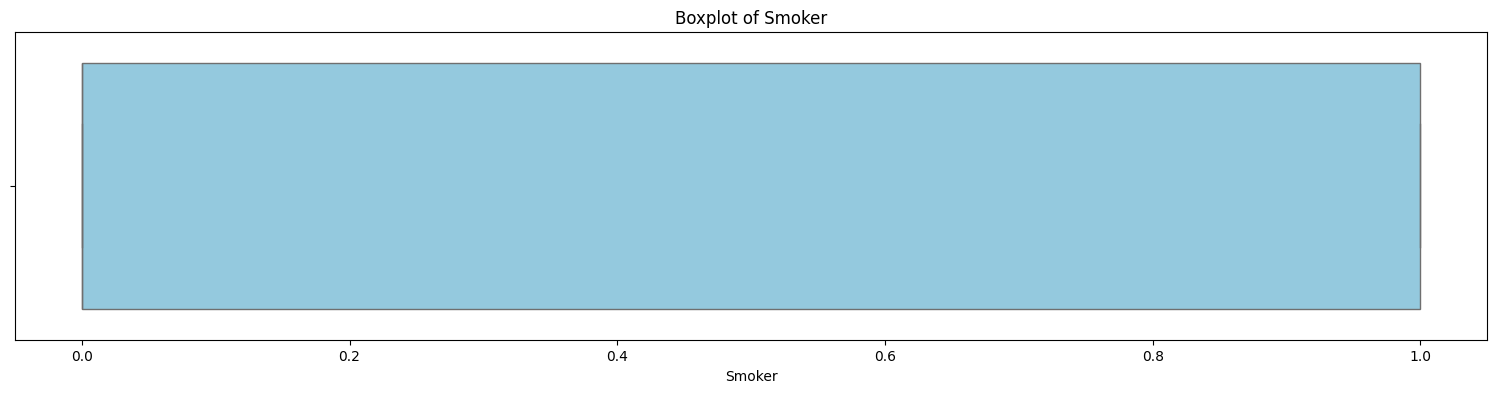

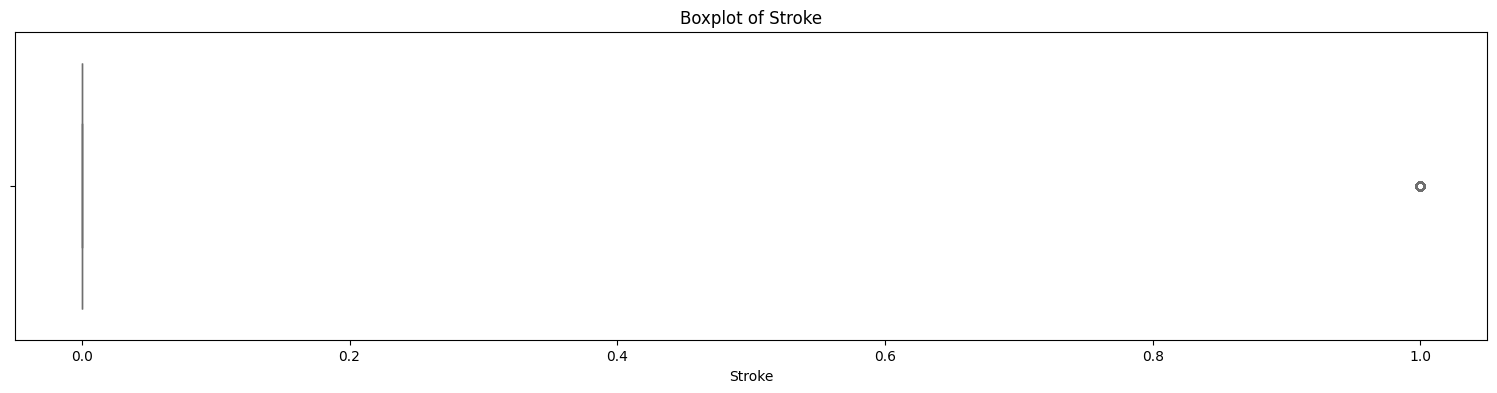

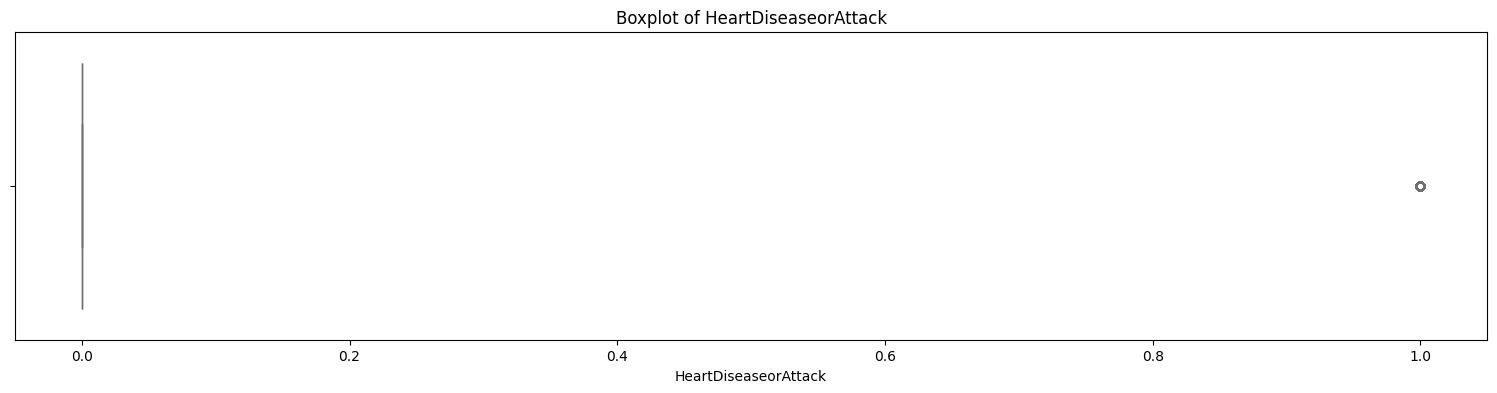

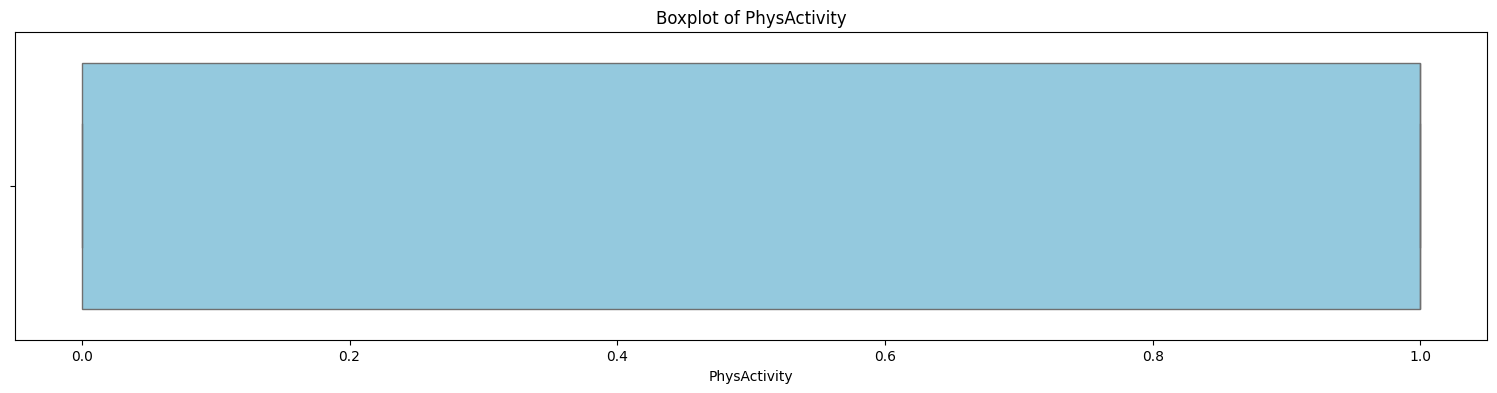

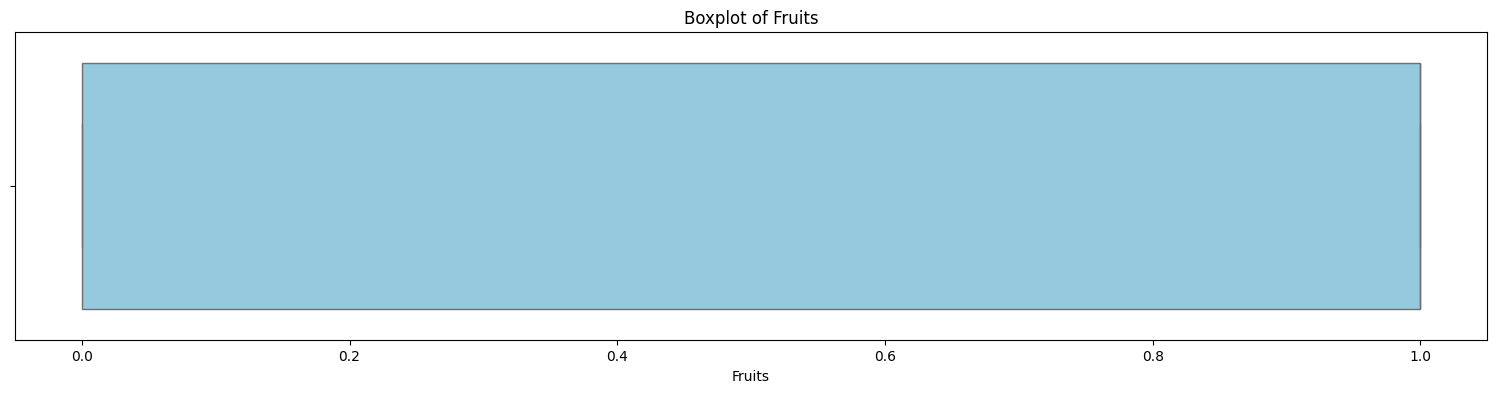

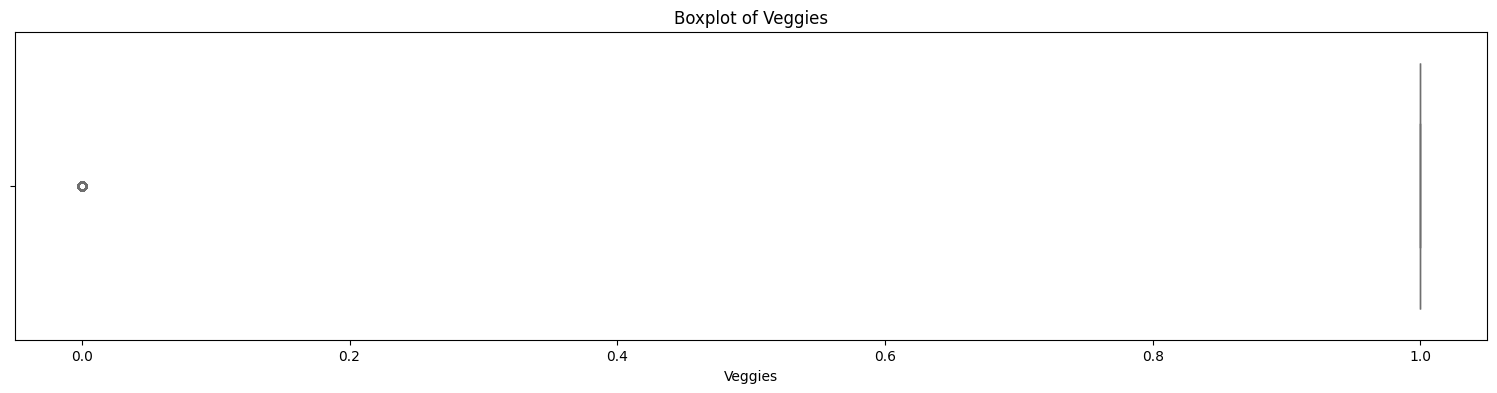

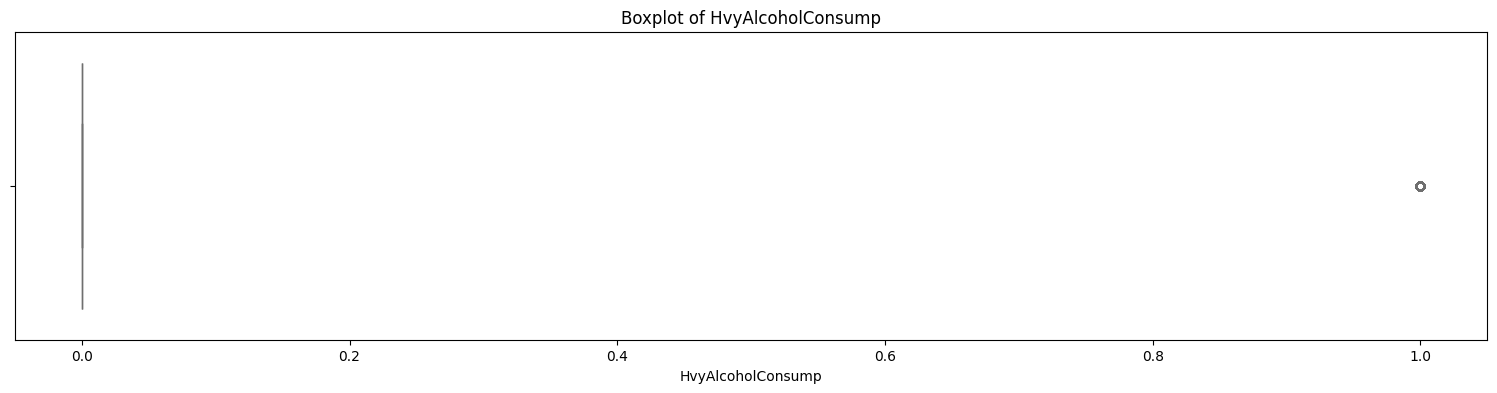

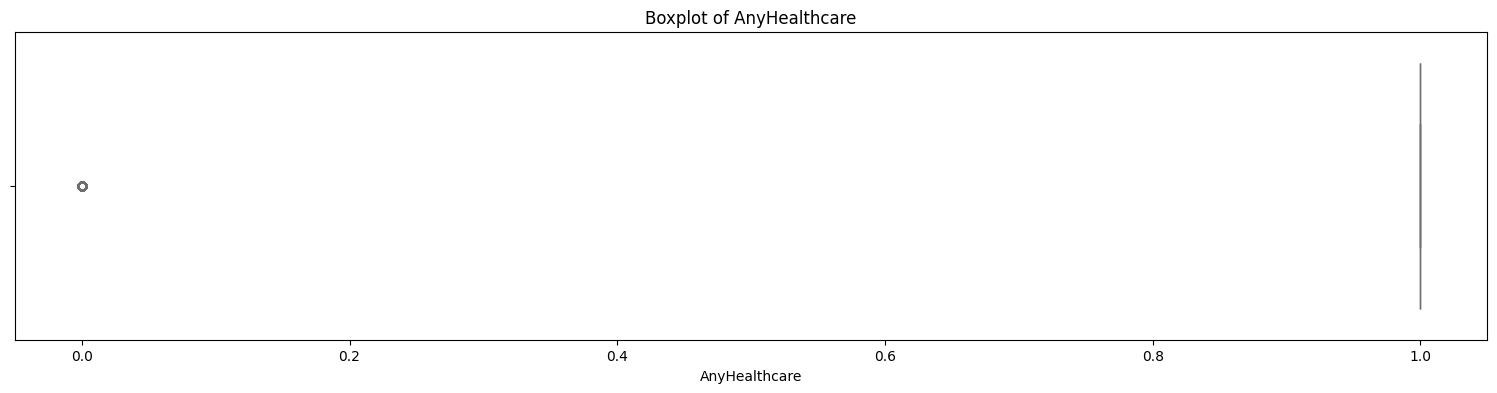

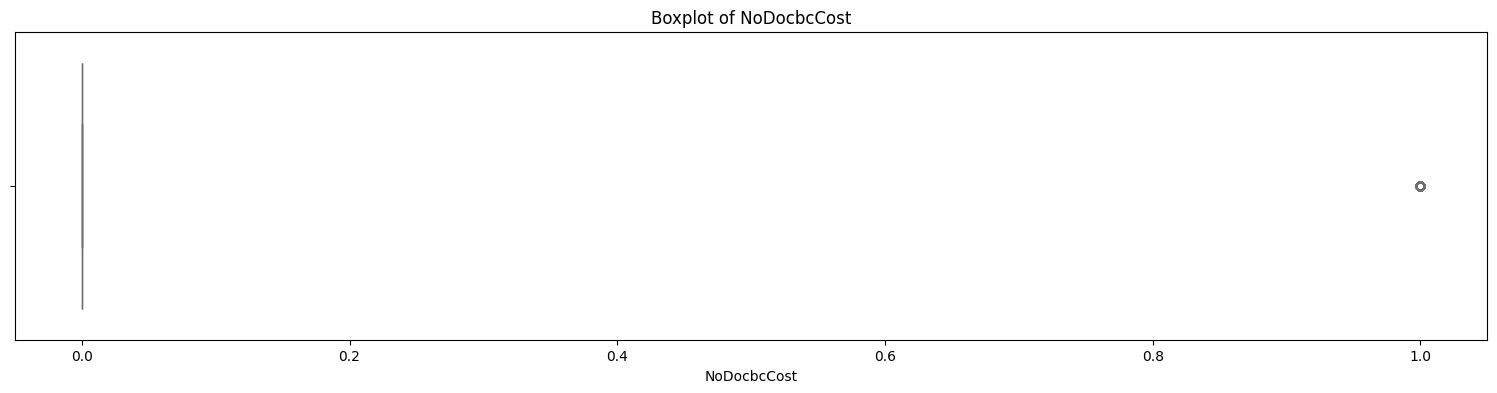

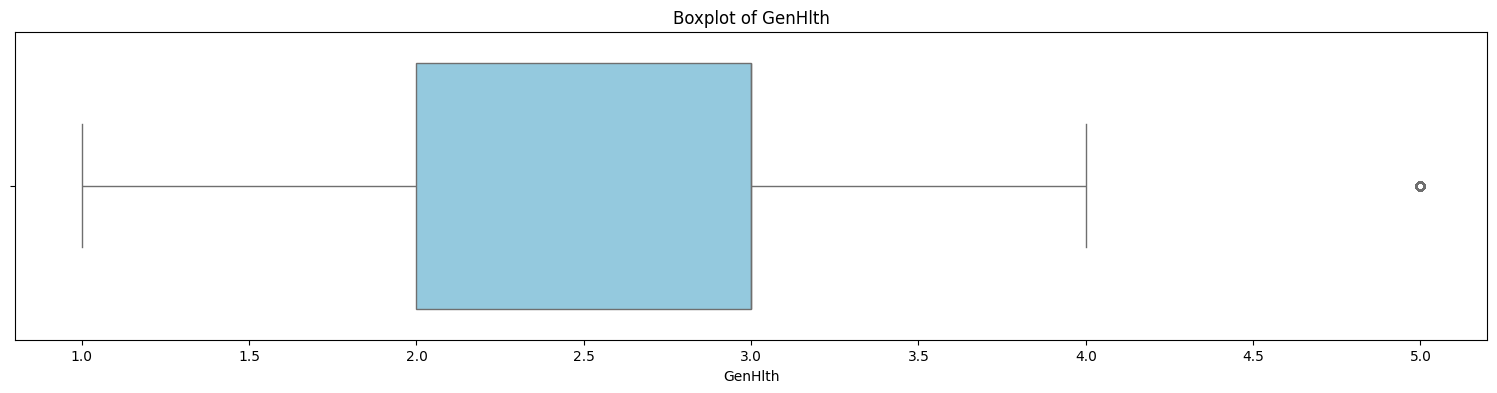

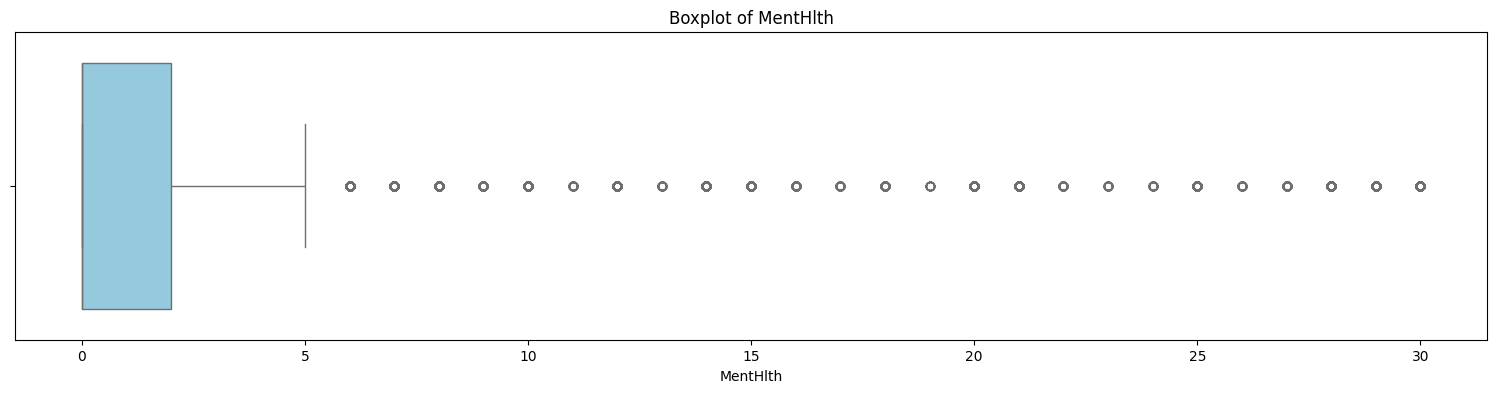

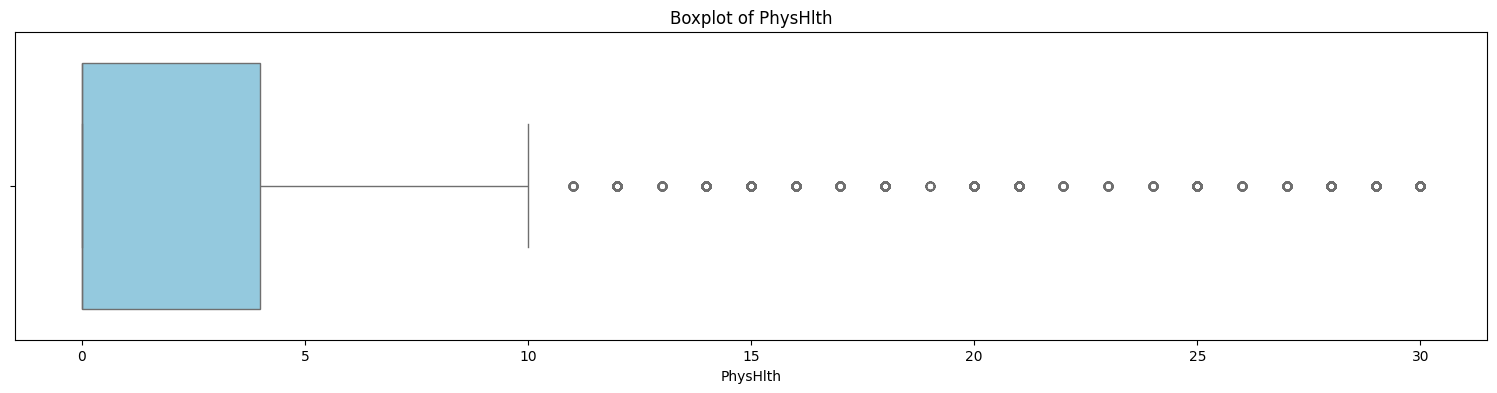

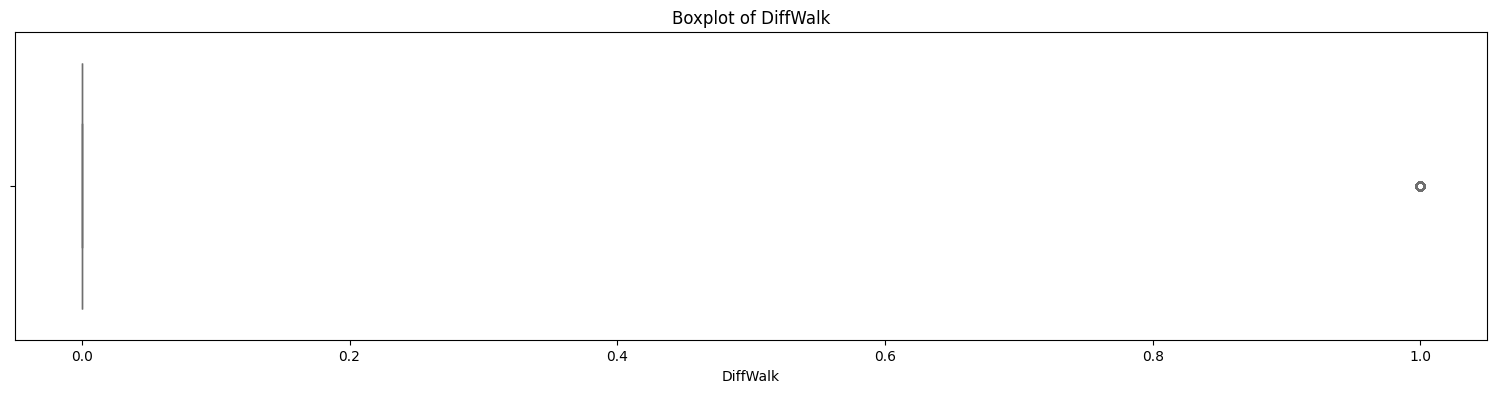

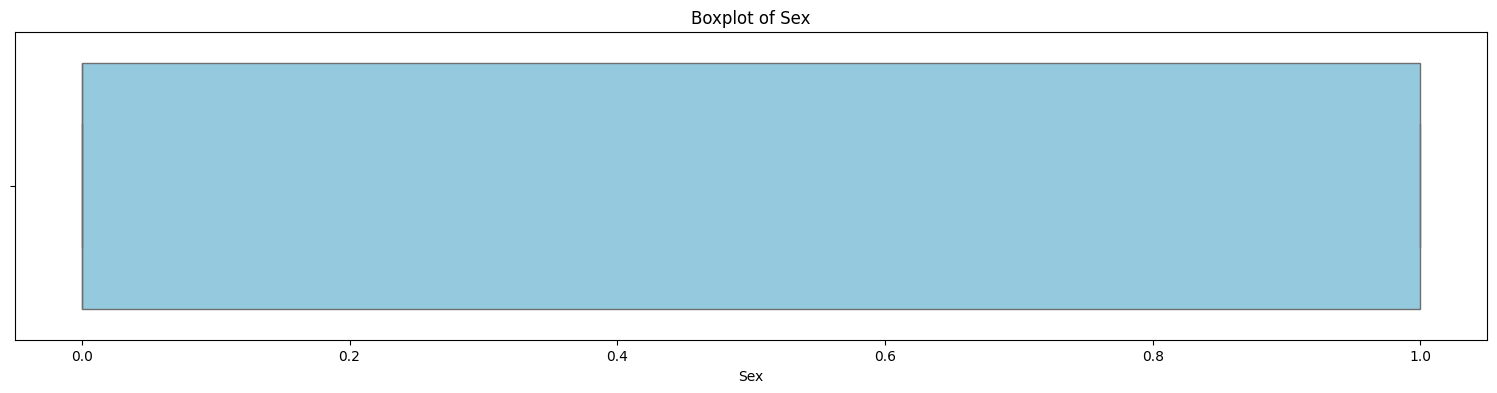

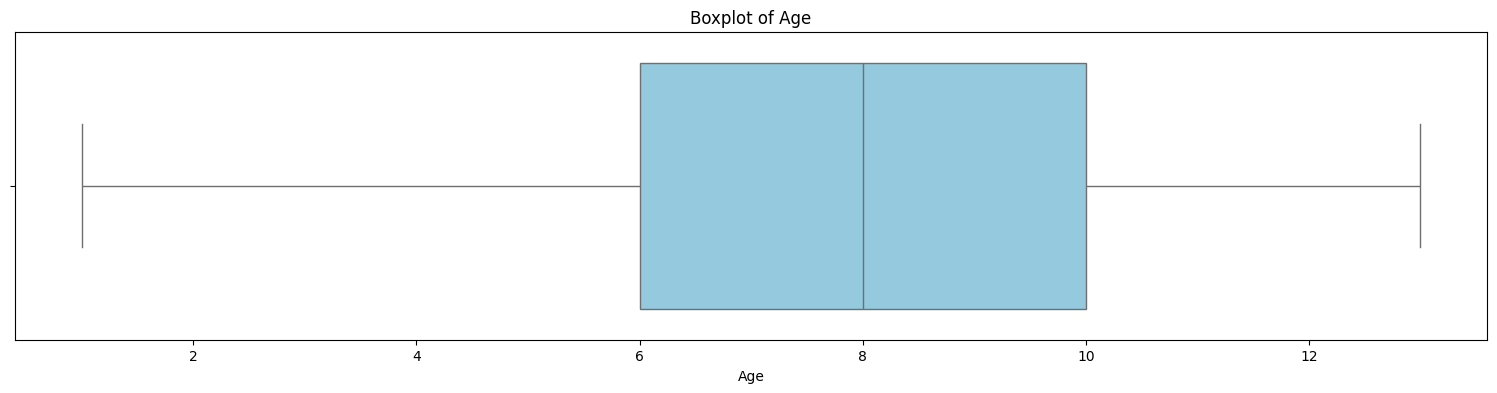

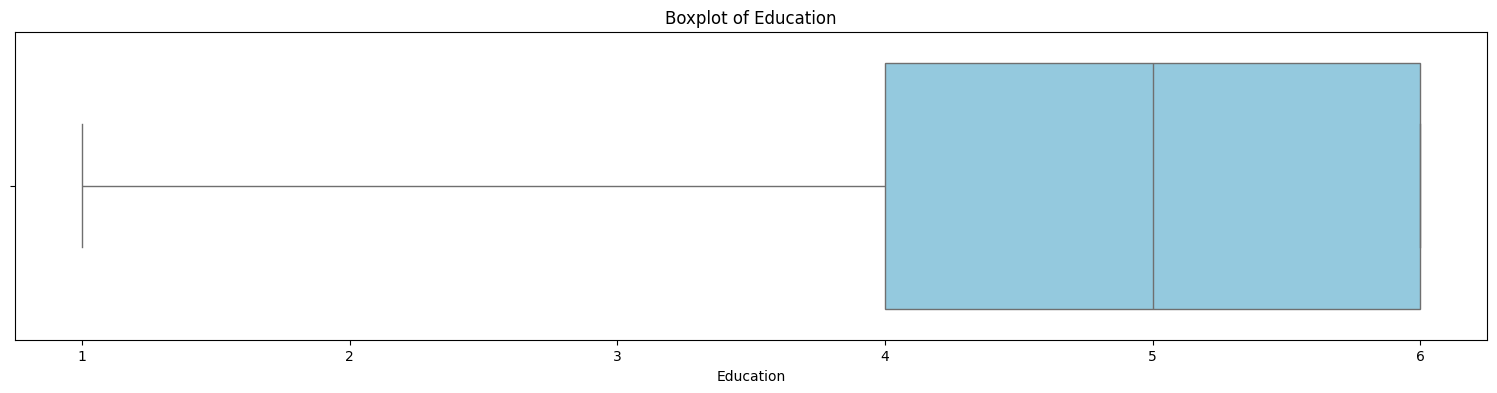

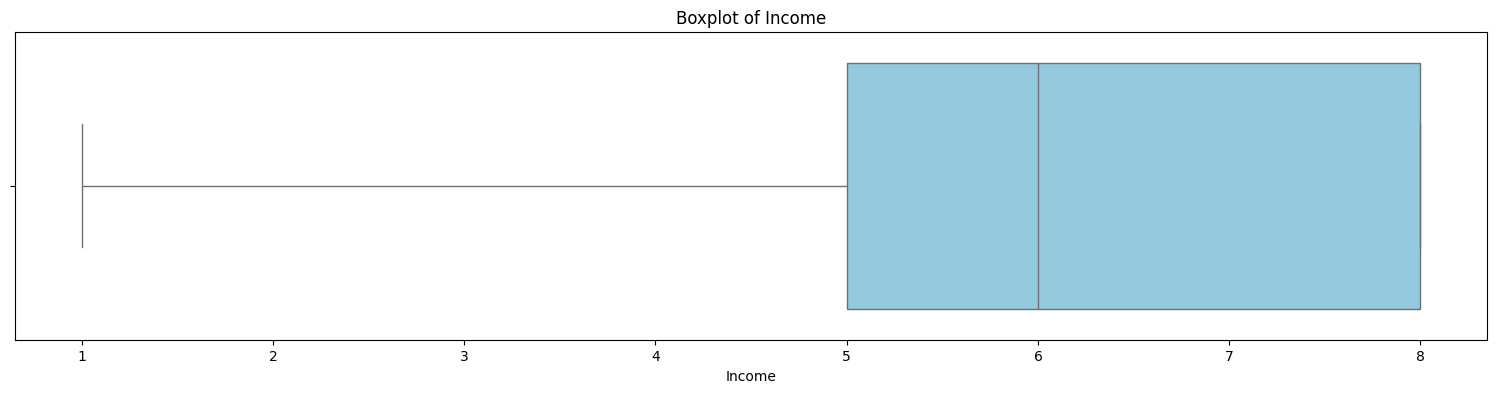

In [ ]:
for feature in x.columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=x[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


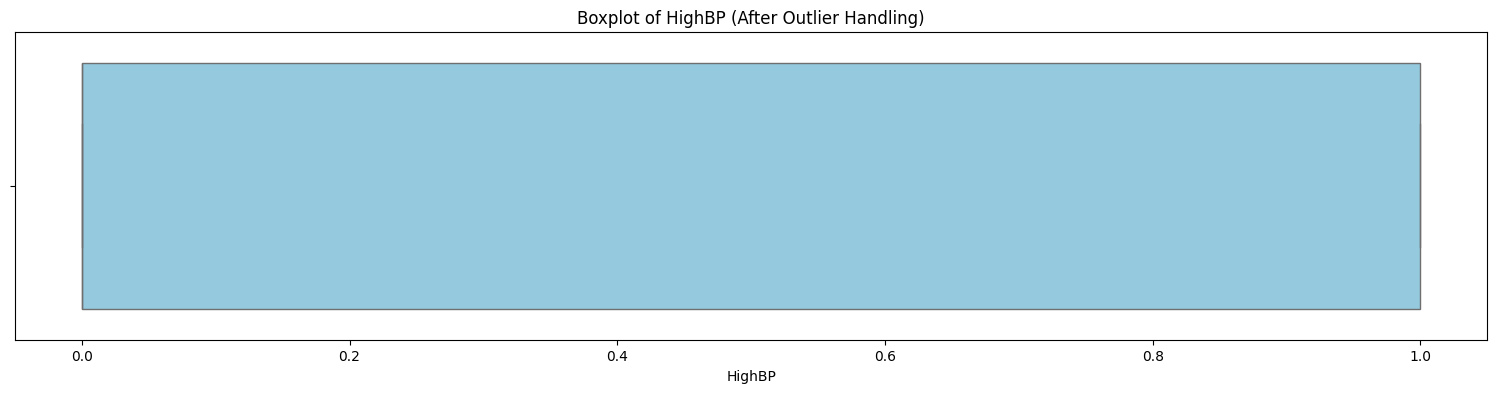

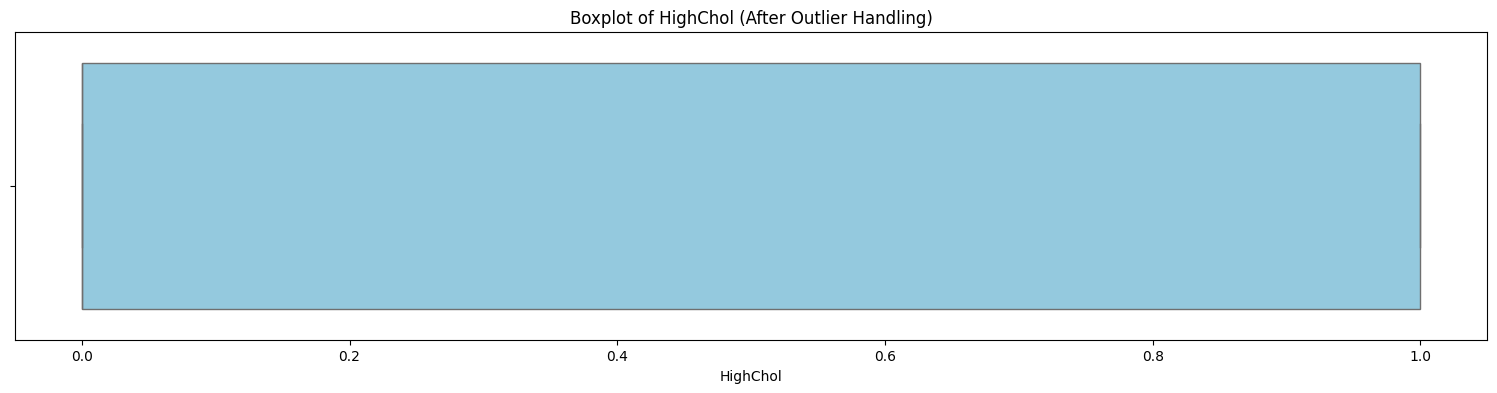

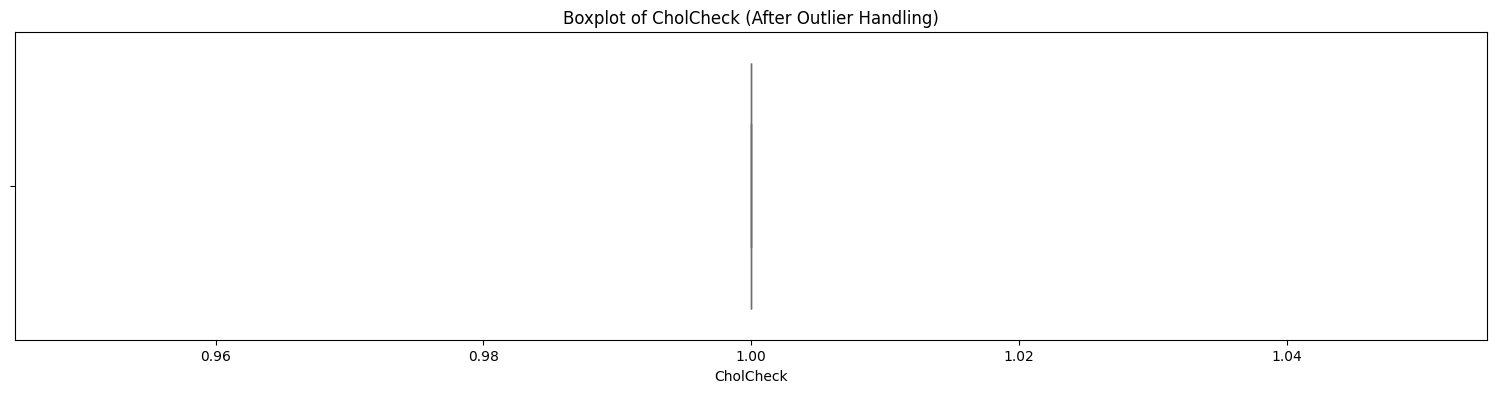

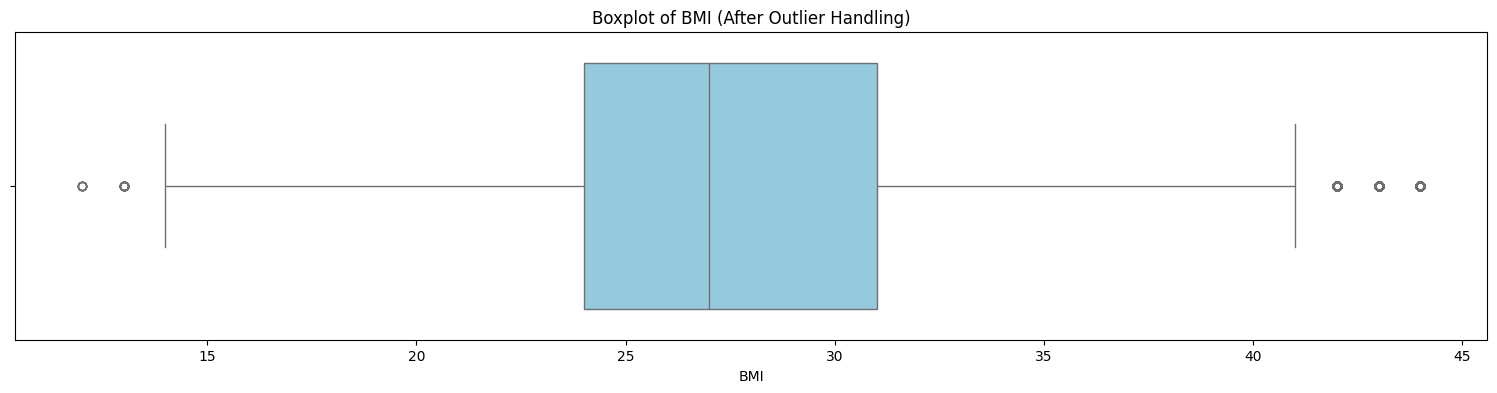

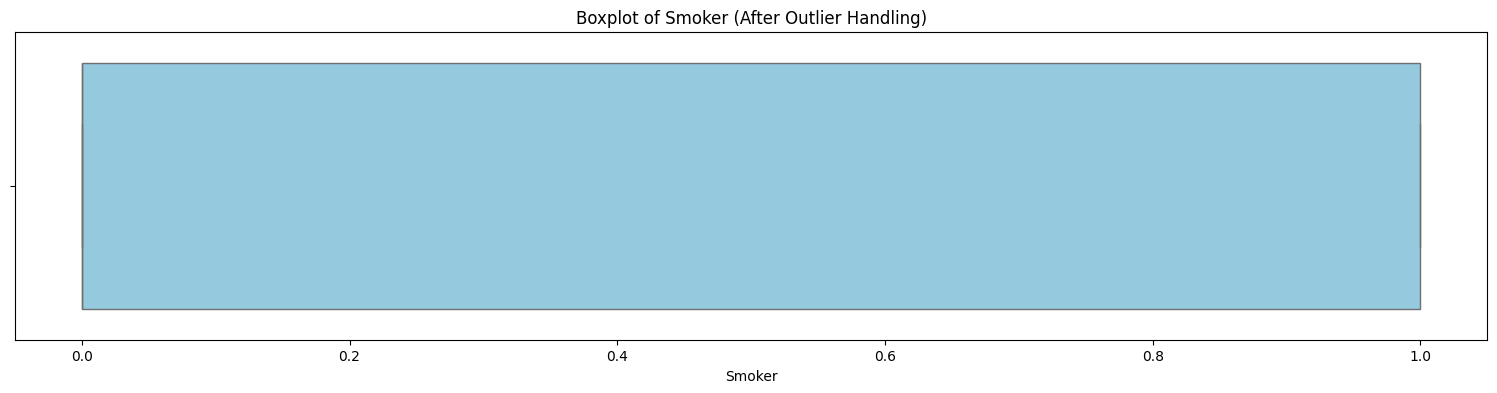

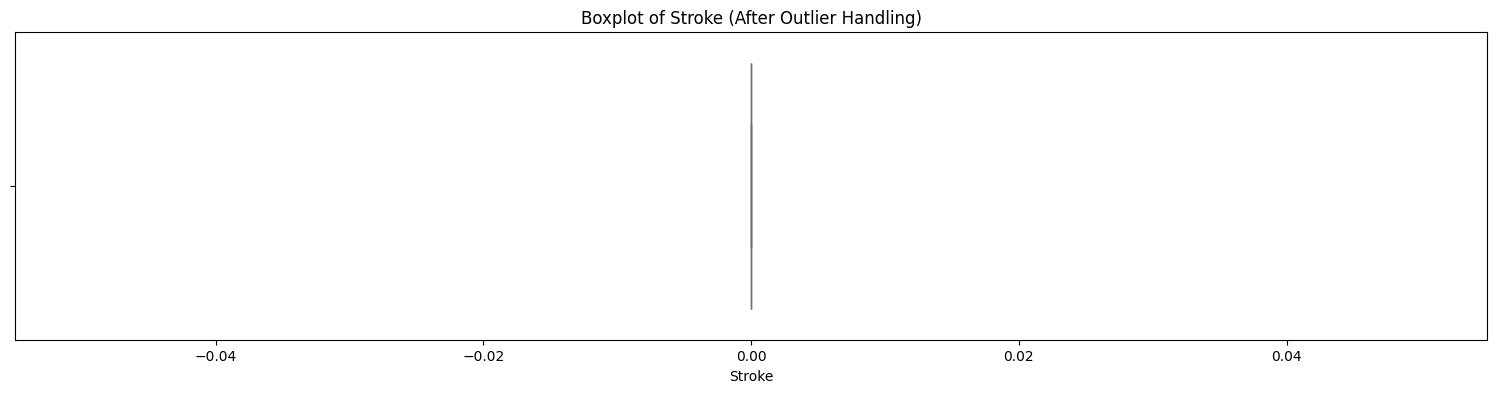

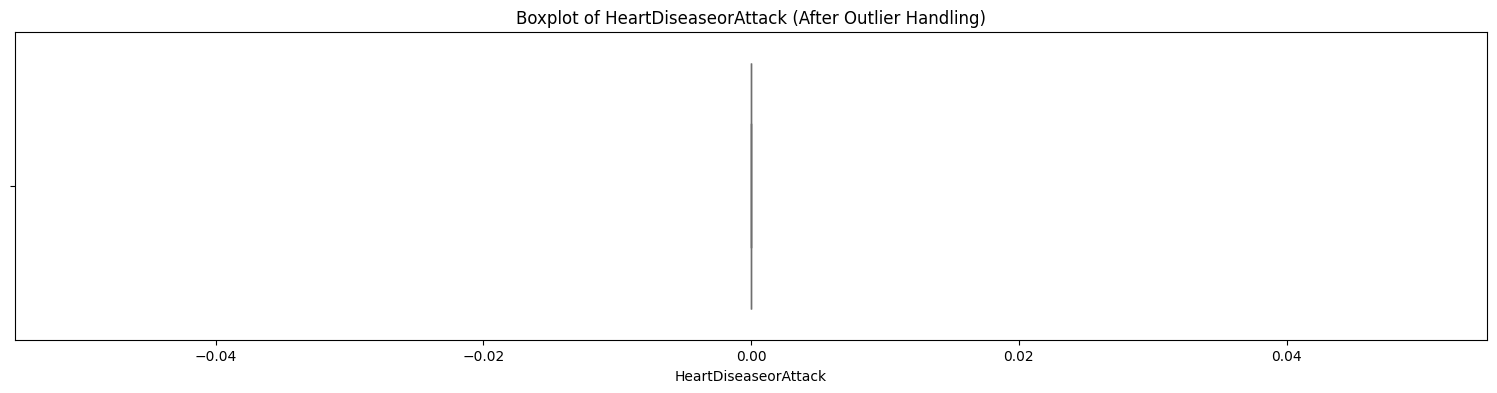

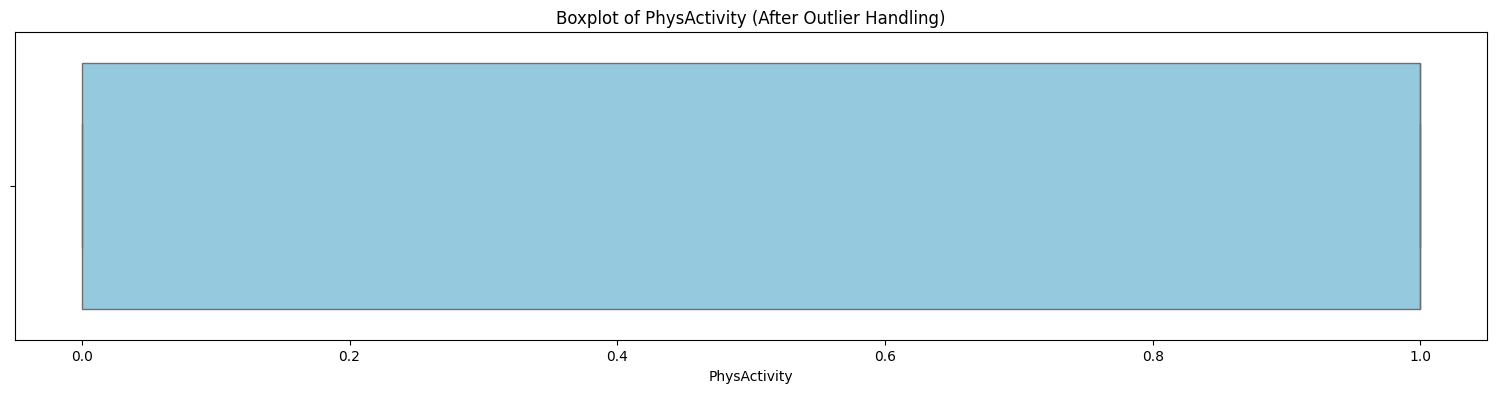

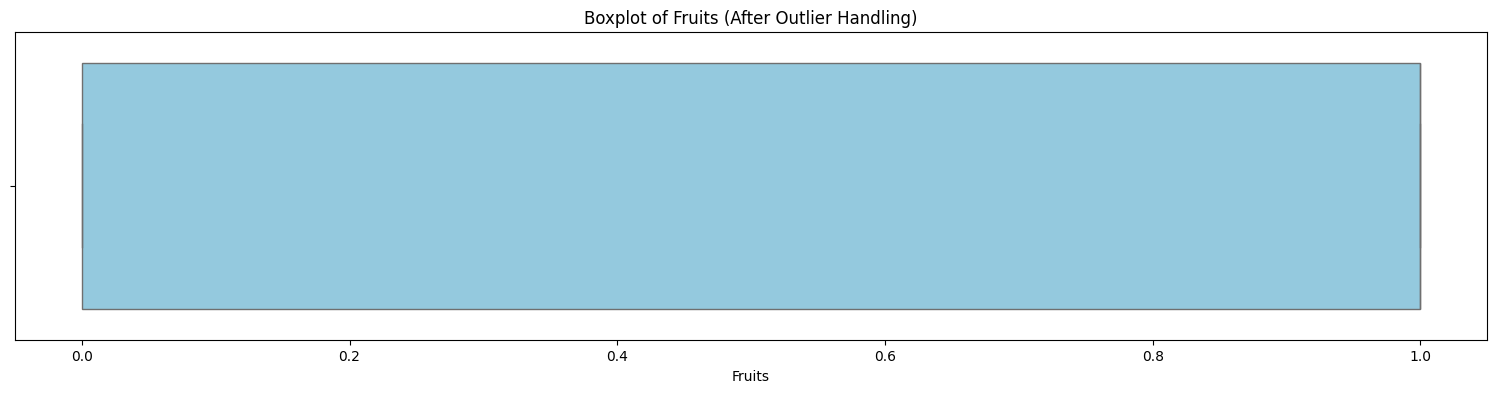

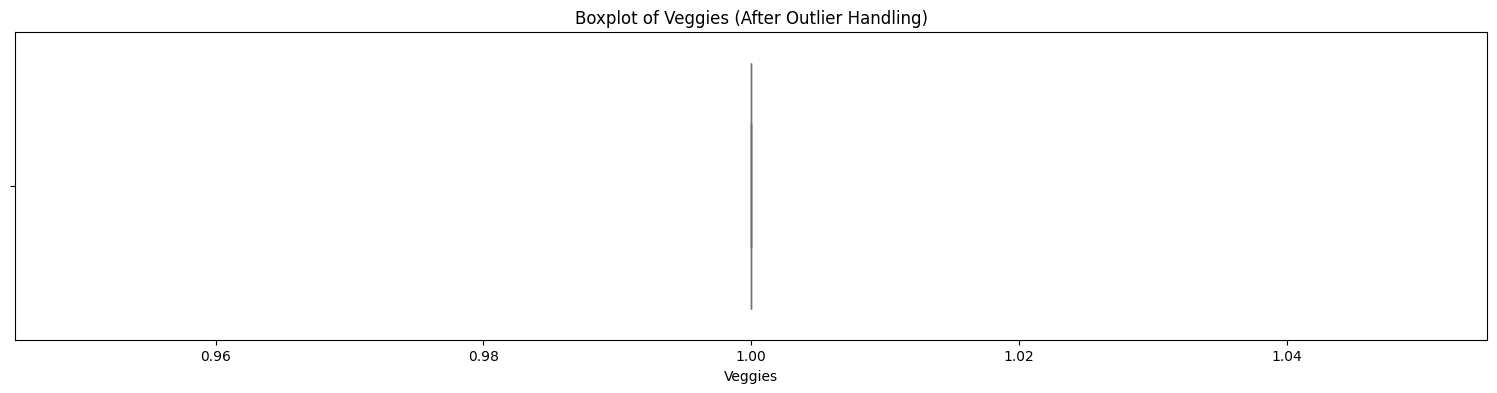

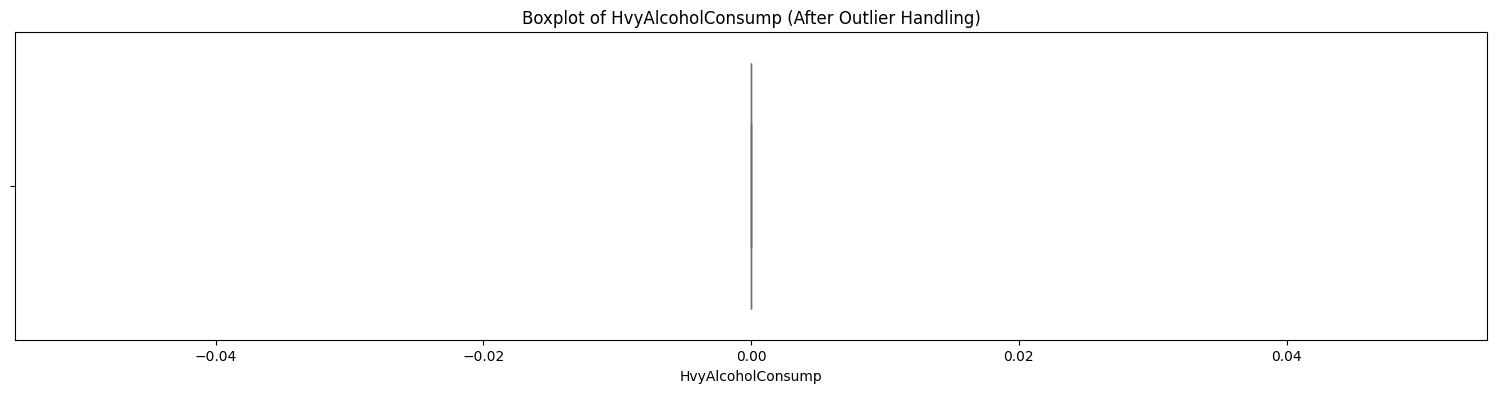

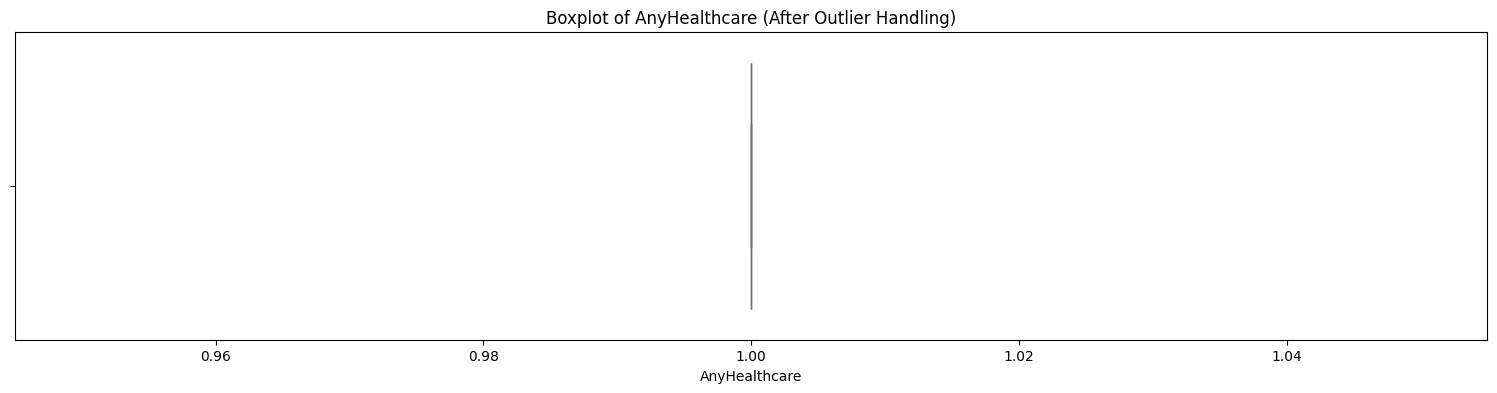

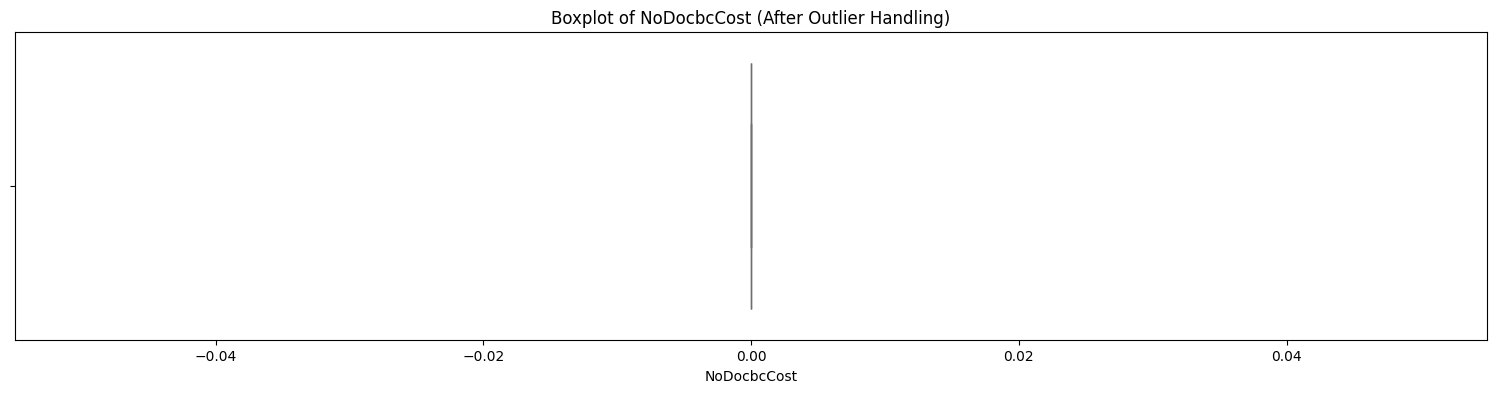

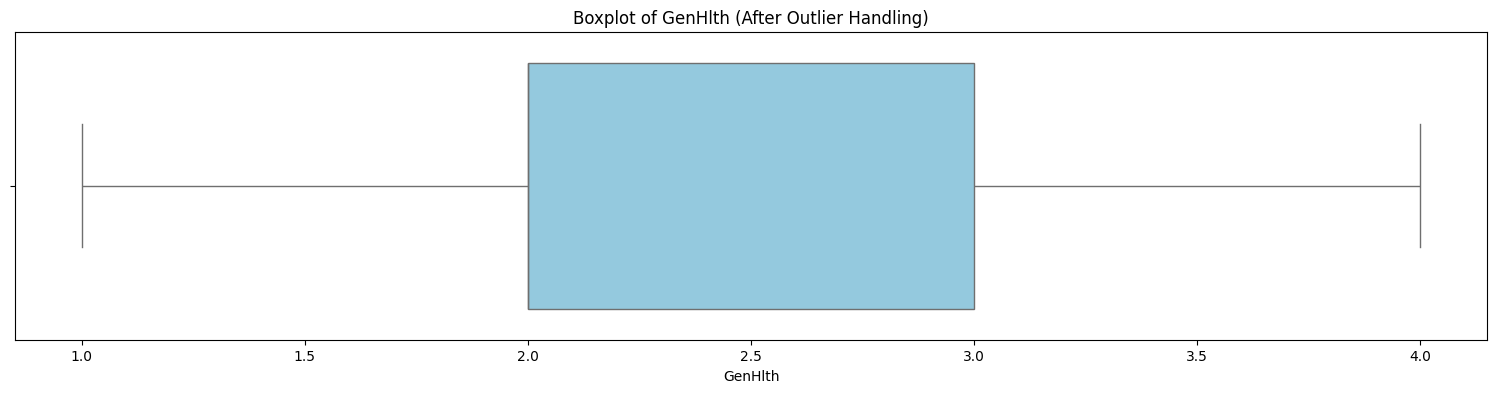

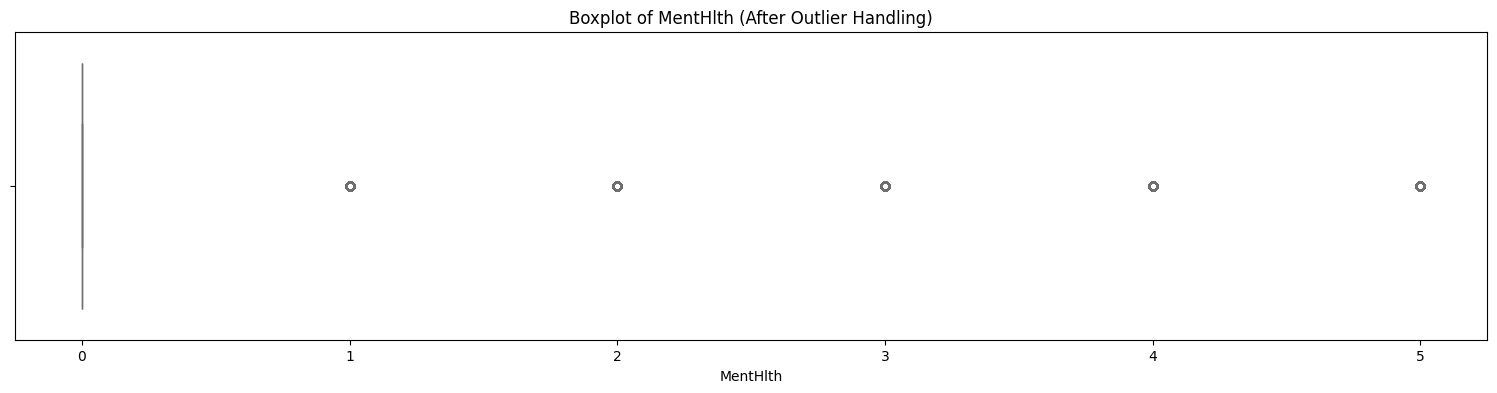

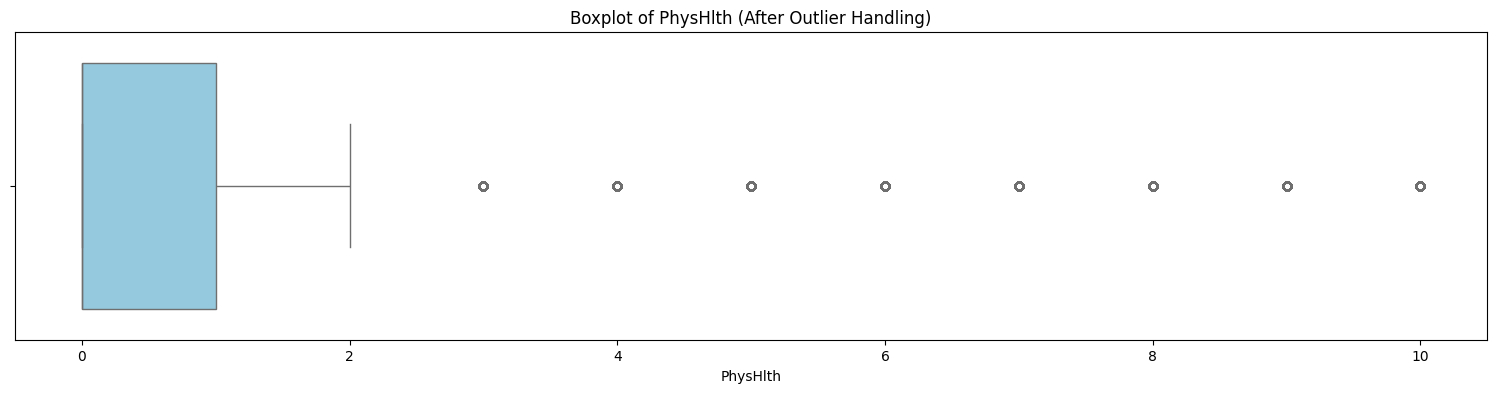

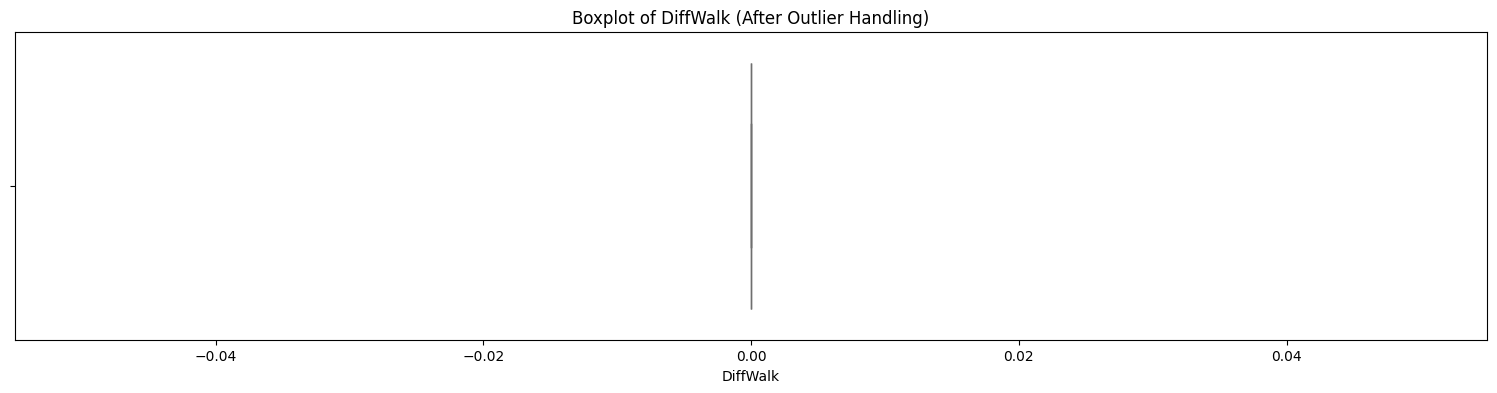

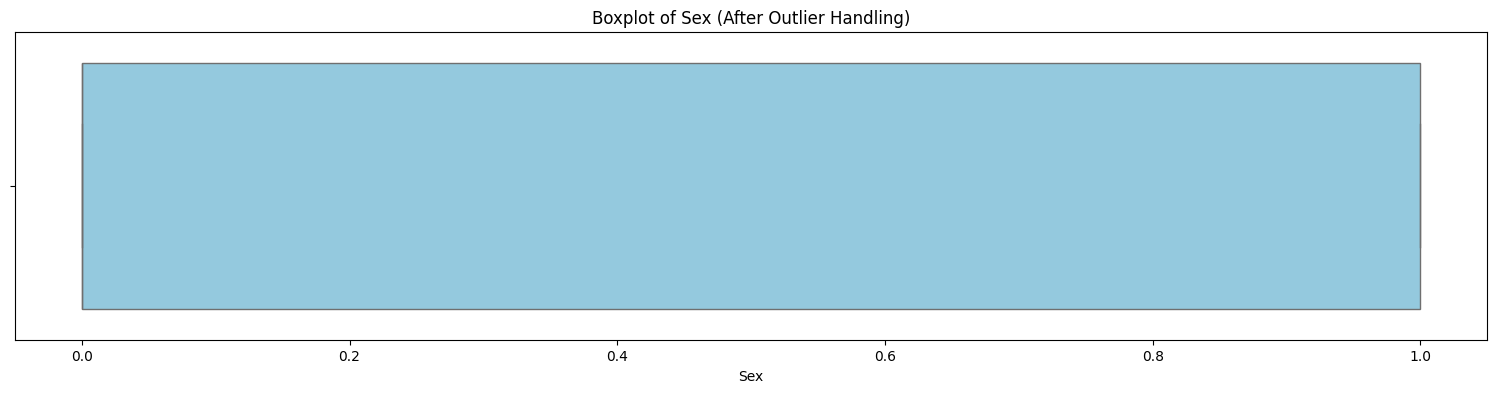

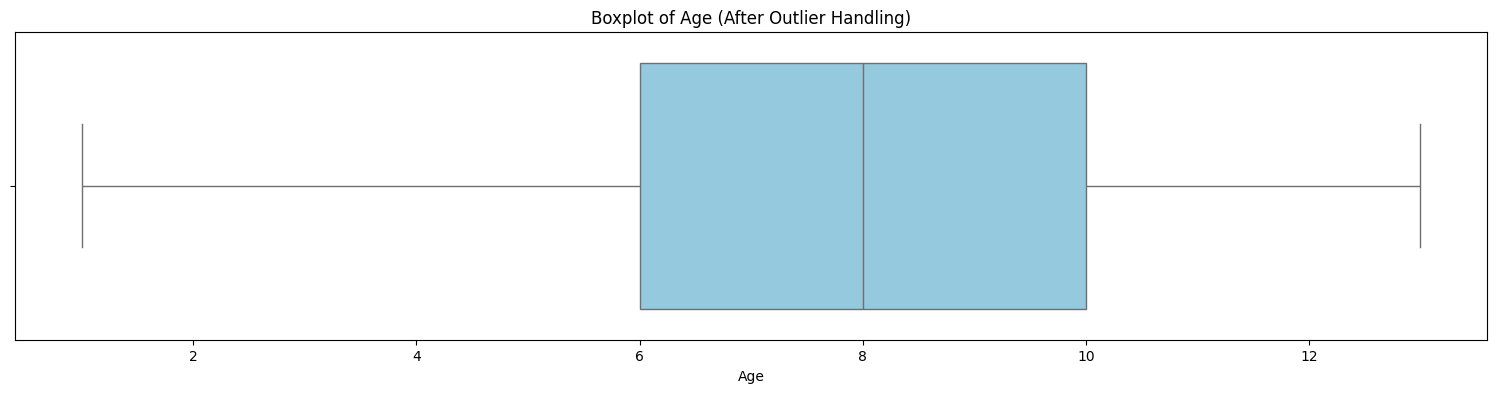

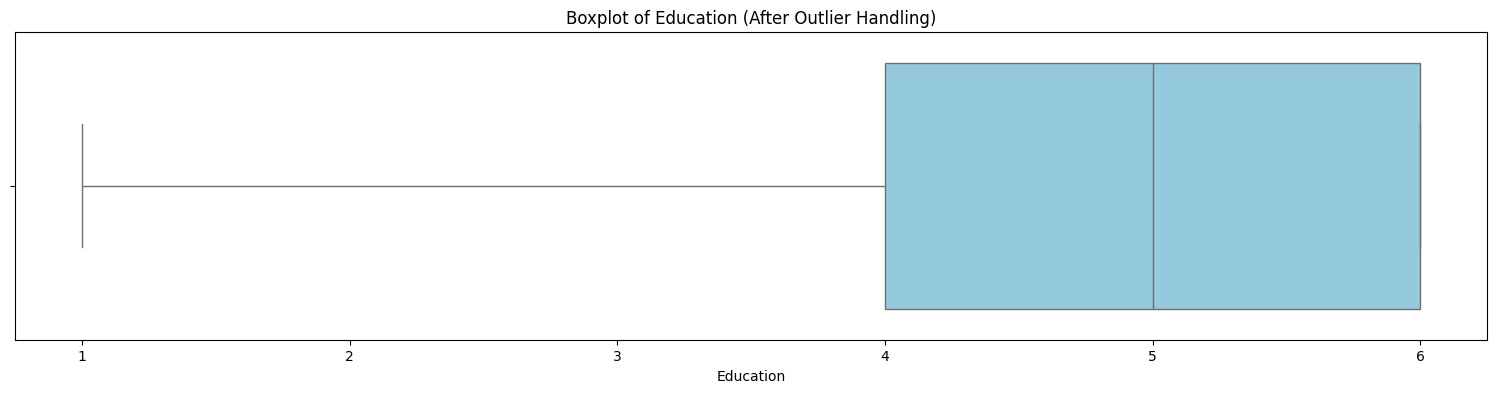

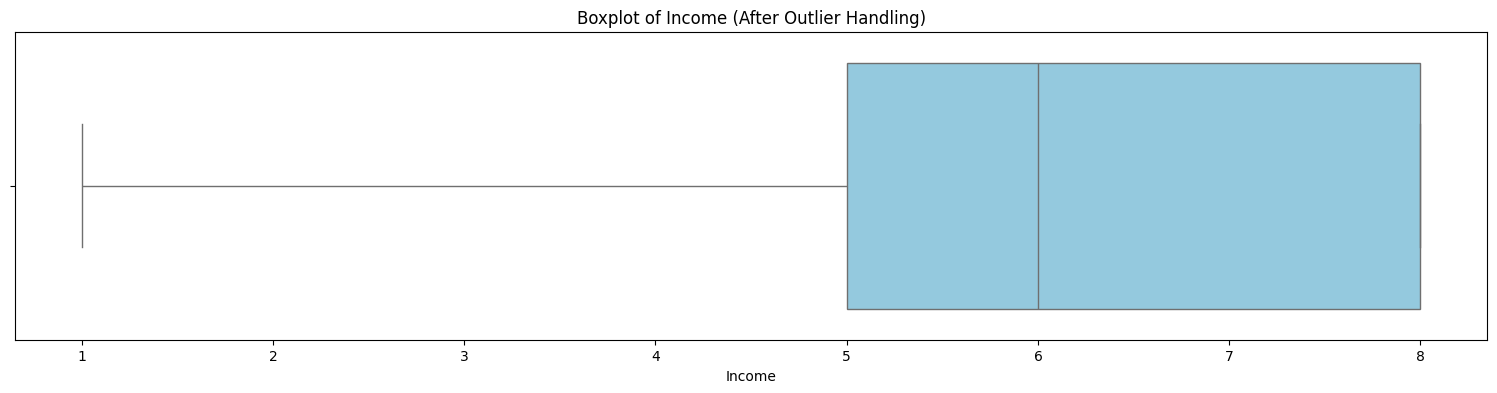

In [ ]:
def handle_outliers(x, col, method='iqr', threshold=1.5):

    if method == 'iqr':
        Q1 = x[col].quantile(0.25)
        Q3 = x[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        x = x[(x[col] >= lower_bound) & (x[col] <= upper_bound)]
    elif method == 'zscore':
        from scipy import stats
        z = np.abs(stats.zscore(x[col]))
        x = x[(z < threshold)]
    else:
        raise ValueError("Invalid outlier handling method. Choose 'iqr' or 'zscore'.")

    return x[col]

for col in x.columns:
    x[col] = handle_outliers(x, col, method='iqr')
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=x[col], color='skyblue')
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    plt.xlabel(col)
    plt.show()


#EDA

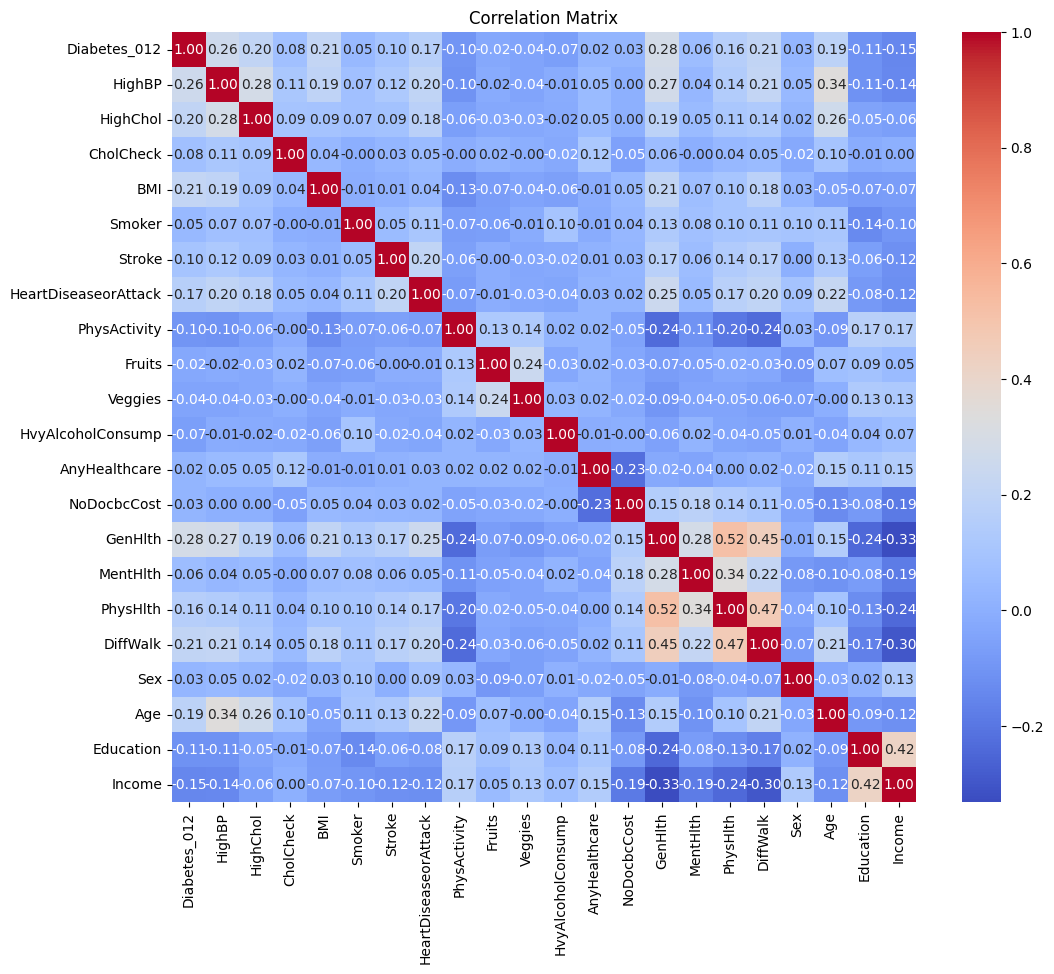

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

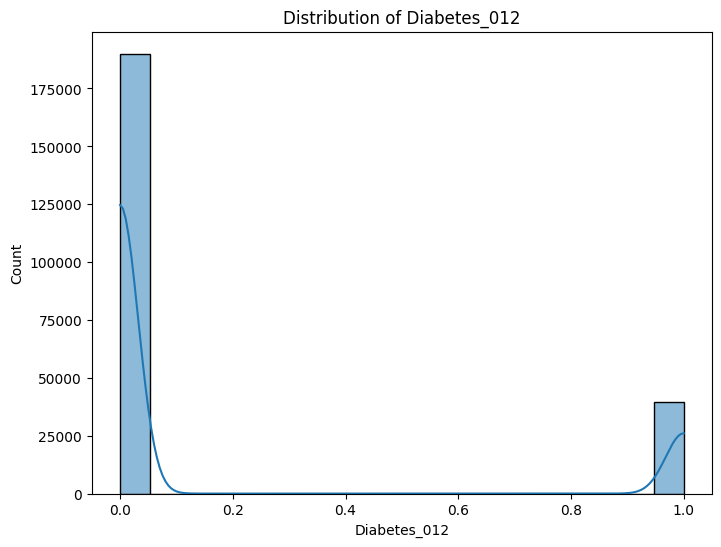

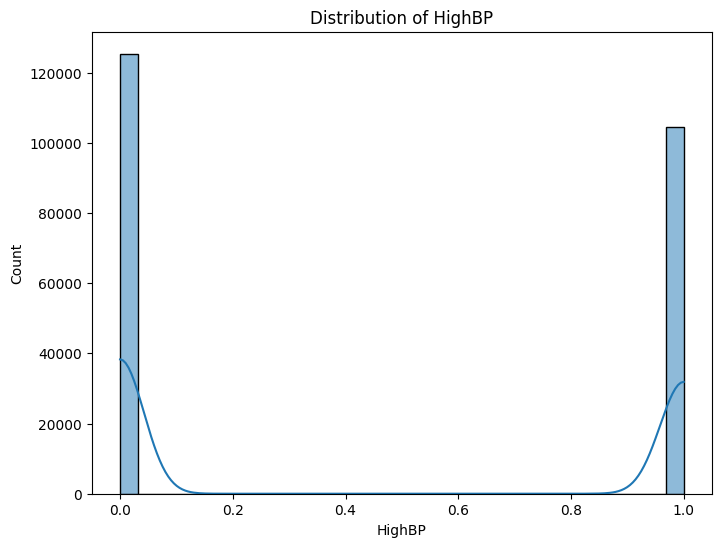

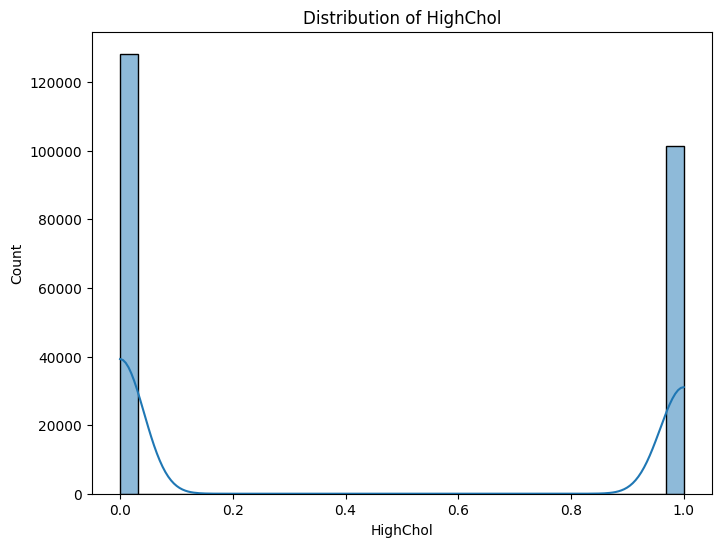

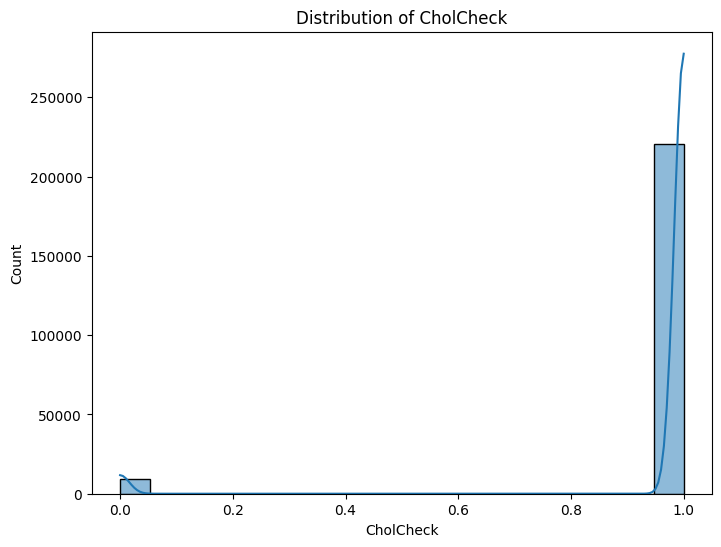

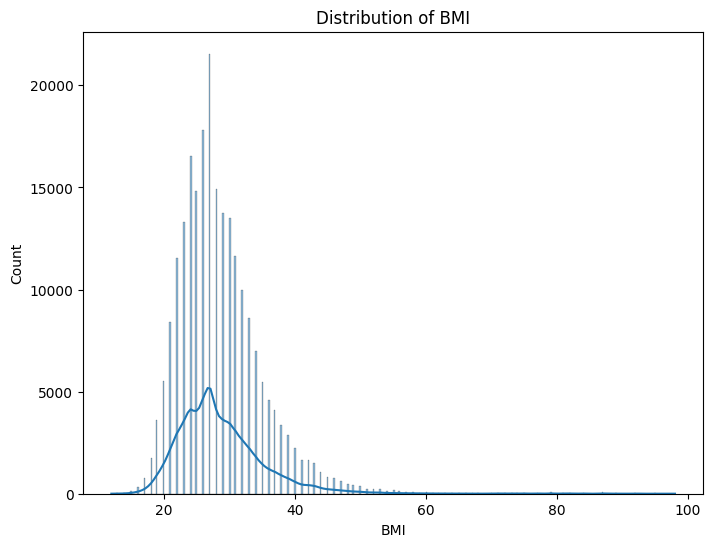

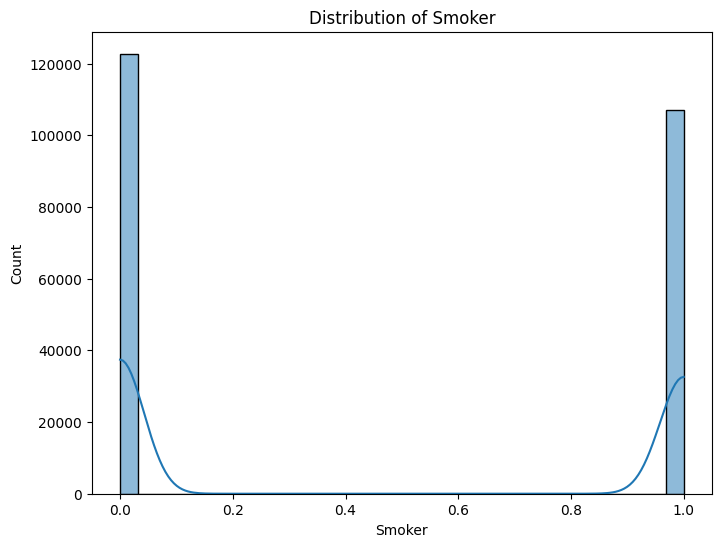

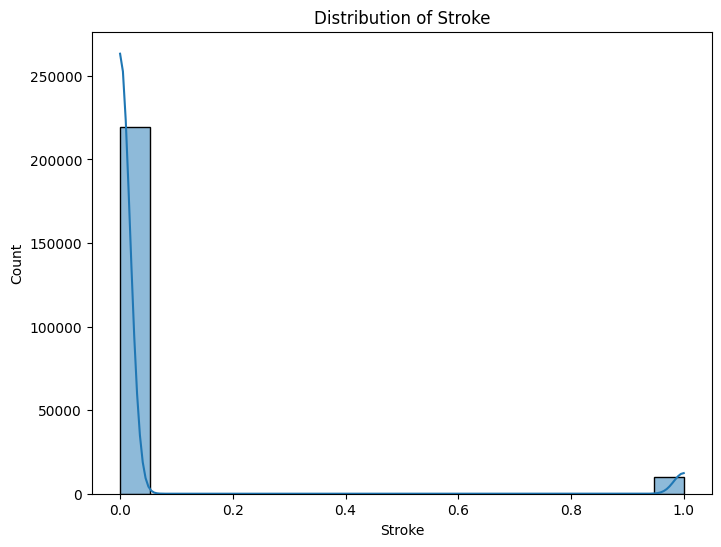

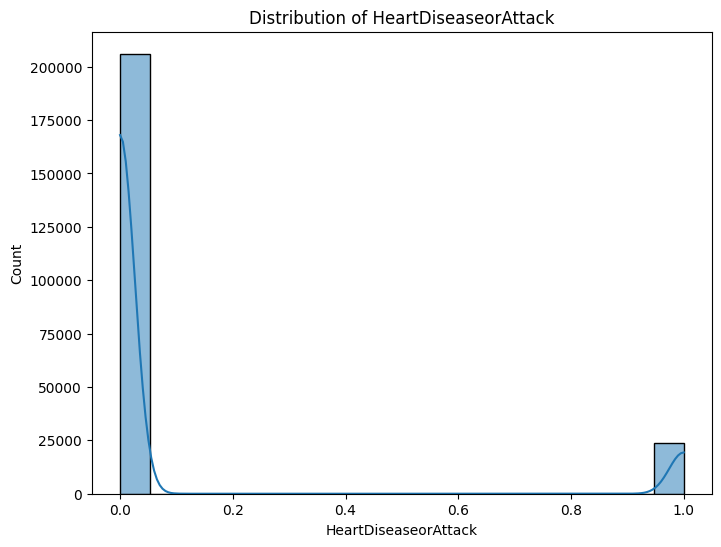

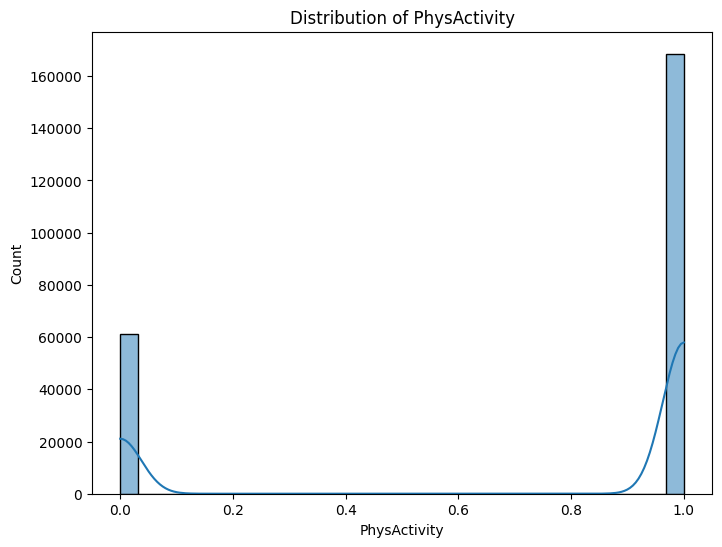

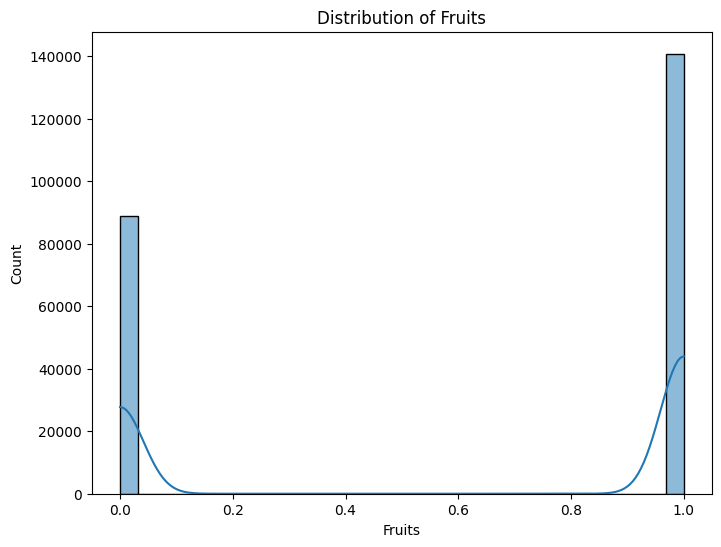

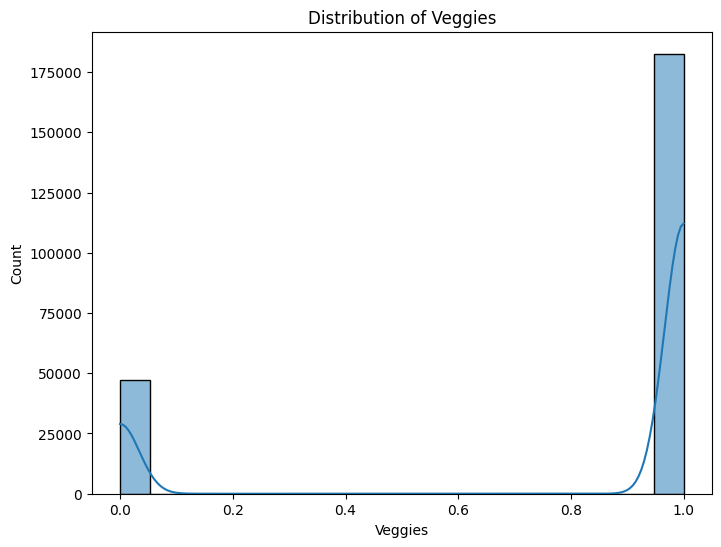

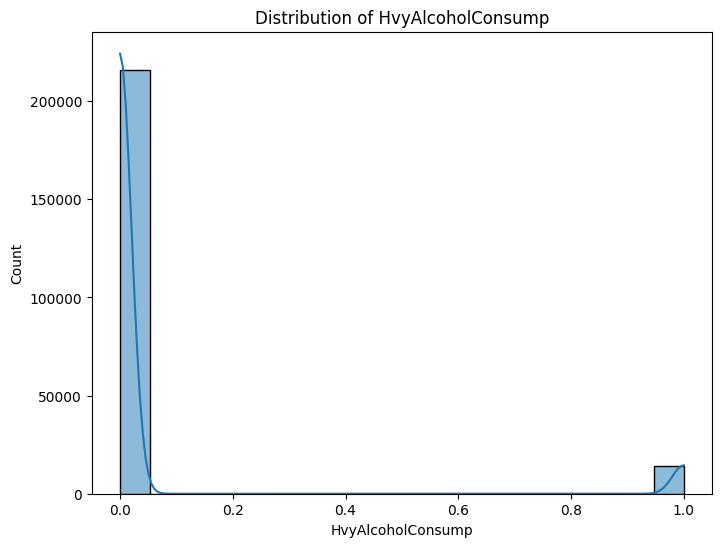

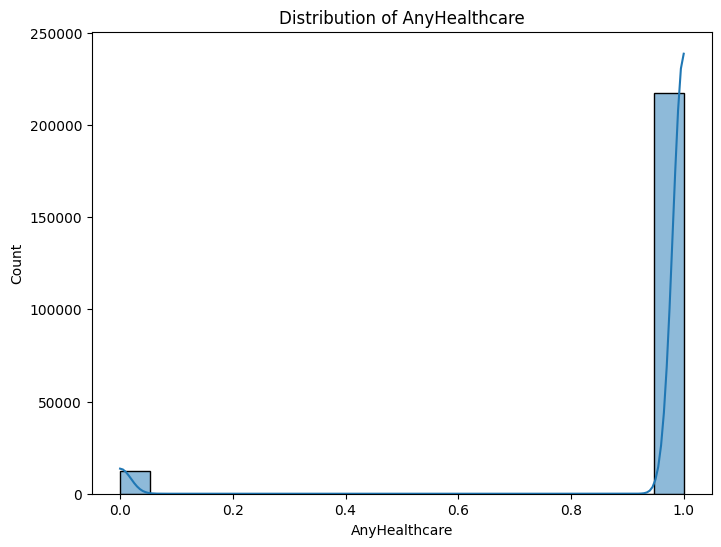

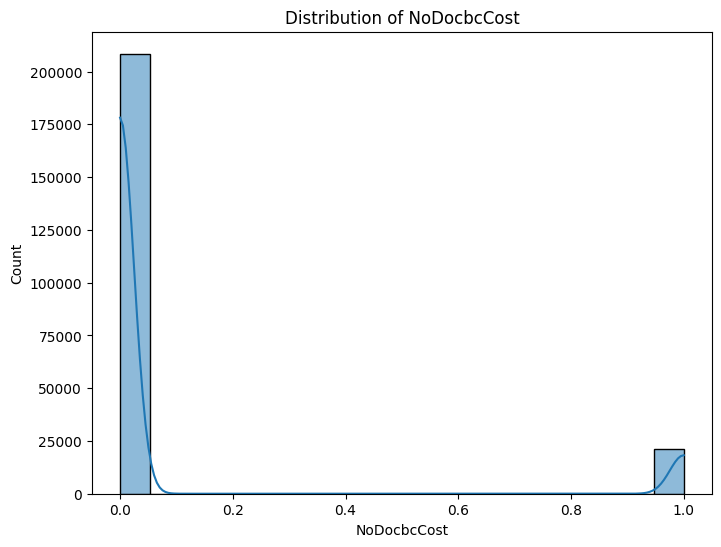

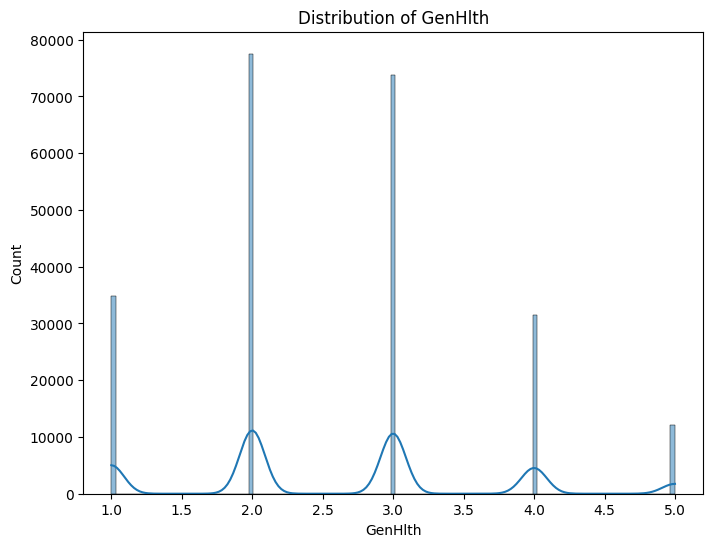

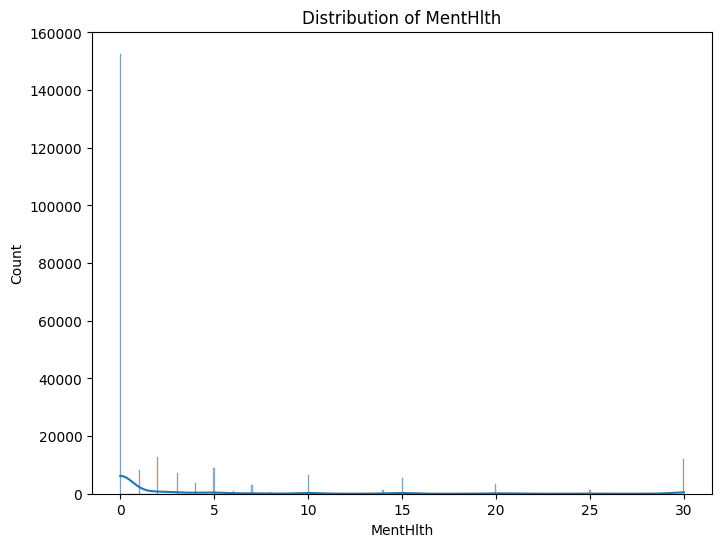

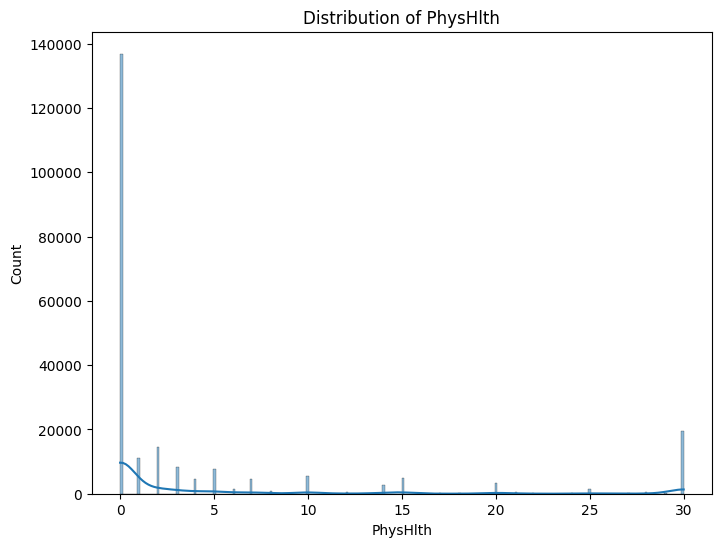

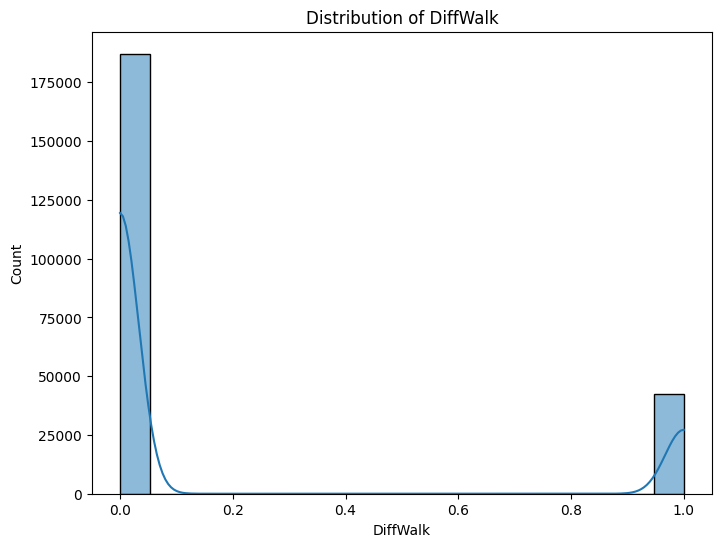

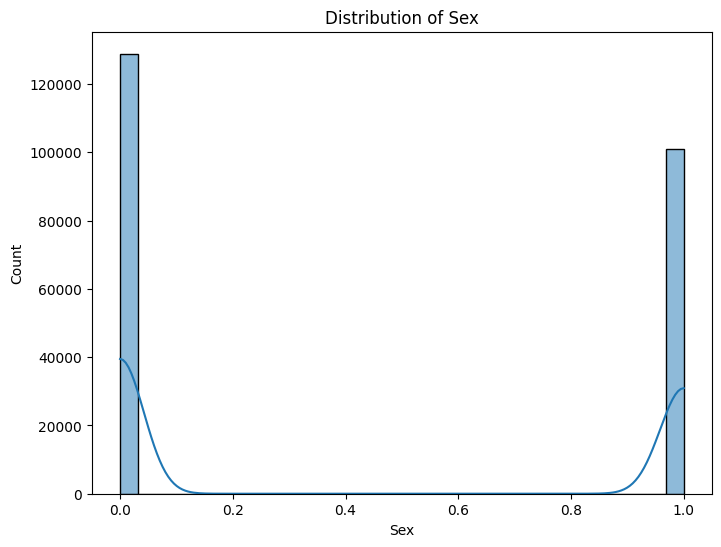

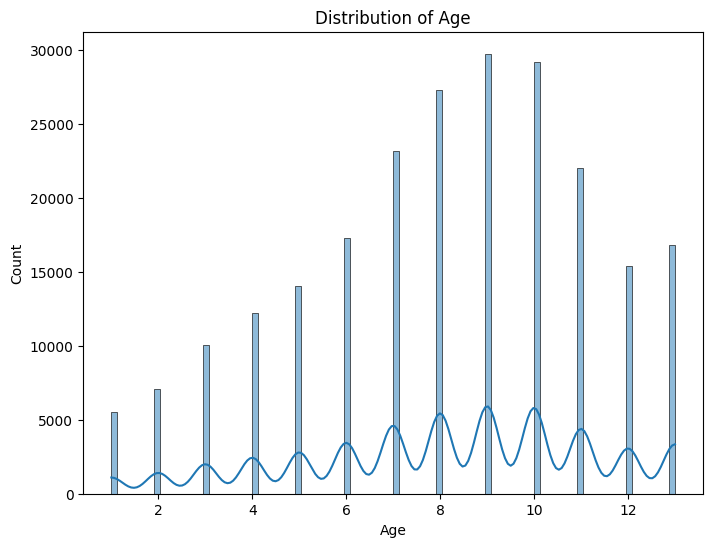

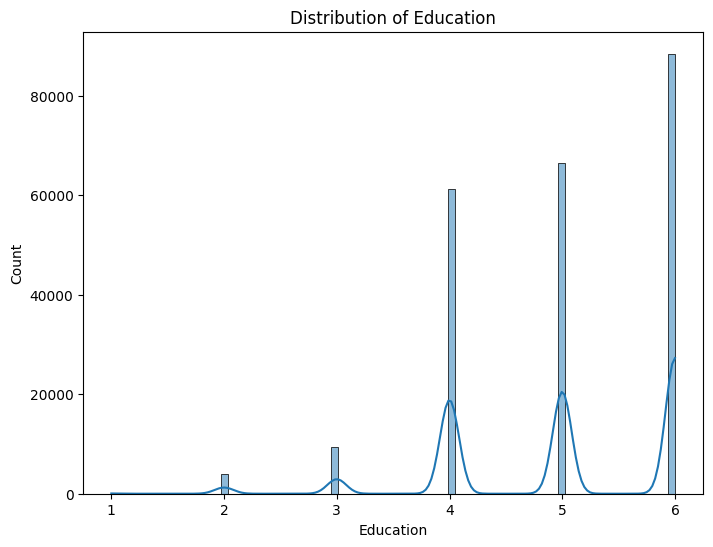

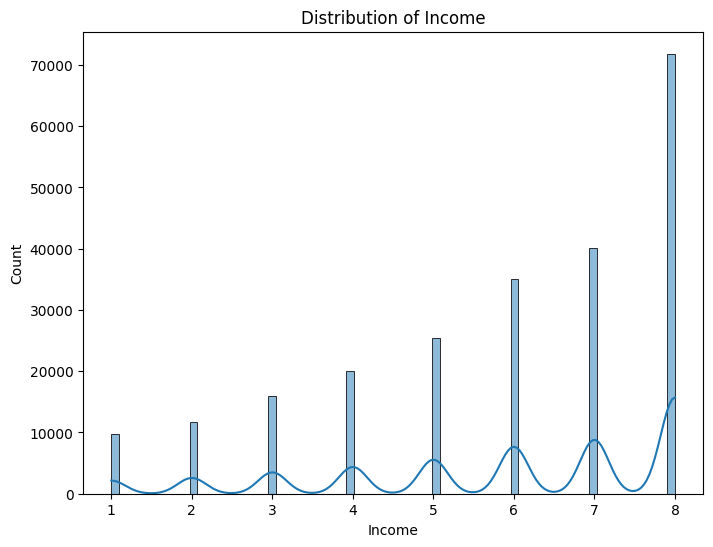

In [ ]:
for col in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

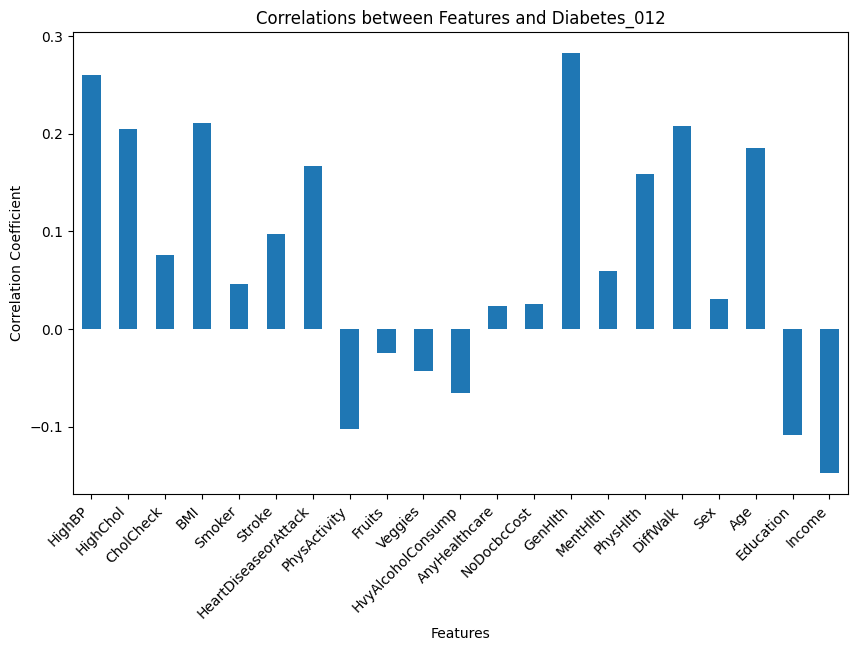

In [ ]:
correlations = df.corr()['Diabetes_012'].drop('Diabetes_012')

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlations between Features and Diabetes_012')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 22/22 [00:03<00:00,  6.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
y.unique()


array([0., 1.])

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_under_sampled, y_undersampled = rus.fit_resample(x,y)



In [ ]:
reasmpled_data=pd.concat([X_under_sampled,y_undersampled], axis=1)
reasmpled_data



HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
10919      1.0       0.0        1.0  27.0     1.0     0.0   
140901     0.0       1.0        1.0  29.0     0.0     0.0   
9569       0.0       0.0        1.0  30.0     0.0     0.0   
8190       0.0       0.0        1.0  20.0     1.0     0.0   
248274     0.0       1.0        1.0  33.0     1.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253666     1.0       0.0        1.0  23.0     0.0     0.0   
253668     0.0       1.0        1.0  29.0     1.0     0.0   
253670     1.0       1.0        1.0  25.0     0.0     0.0   
253676     1.0       1.0        1.0  18.0     0.0     0.0   
253679     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
10919                    0.0           1.0     1.0      1.0  ...          0.0   
140901                   0.0           1.0     0.0      1.0  ...          0.0   
9569                     0.0           1.0     1.0      1.0  ...          0.0   
8190                     0.0           1.0     0.0      1.0  ...          0.0   
248274                   0.0           1.0     0.0      1.0  ...          0.0   
...                      ...           ...     ...      ...  ...          ...   
253666                   0.0           0.0     1.0      1.0  ...          0.0   
253668                   NaN           0.0     1.0      1.0  ...          0.0   
253670                   NaN           0.0     1.0      NaN  ...          0.0   
253676                   0.0           0.0     0.0      NaN  ...          0.0   
253679                   NaN           1.0     1.0      NaN  ...          0.0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  \
10919       4.0       2.0       4.0       NaN  1.0  13.0        4.0     6.0   
140901      1.0       2.0       0.0       0.0  0.0   4.0        5.0     7.0   
9569        1.0       2.0       0.0       0.0  0.0   5.0        6.0     7.0   
8190        3.0       0.0       4.0       0.0  0.0  11.0        6.0     6.0   
248274      2.0       NaN       0.0       0.0  0.0   8.0        5.0     4.0   
...         ...       ...       ...       ...  ...   ...        ...     ...   
253666      3.0       0.0       NaN       0.0  0.0   6.0        5.0     2.0   
253668      2.0       0.0       0.0       NaN  1.0  10.0        3.0     6.0   
253670      NaN       NaN       0.0       NaN  0.0  13.0        6.0     4.0   
253676      4.0       0.0       0.0       NaN  0.0  11.0        2.0     4.0   
253679      2.0       0.0       0.0       0.0  0.0   9.0        6.0     2.0   

        Diabetes_012  
10919            0.0  
140901           0.0  
9569             0.0  
8190             0.0  
248274           0.0  
...              ...  
253666           1.0  
253668           1.0  
253670           1.0  
253676           1.0  
253679           1.0  

[79452 rows x 22 columns]

In [ ]:
reasmpled_data['Diabetes_012'].unique()

array([0., 1.])

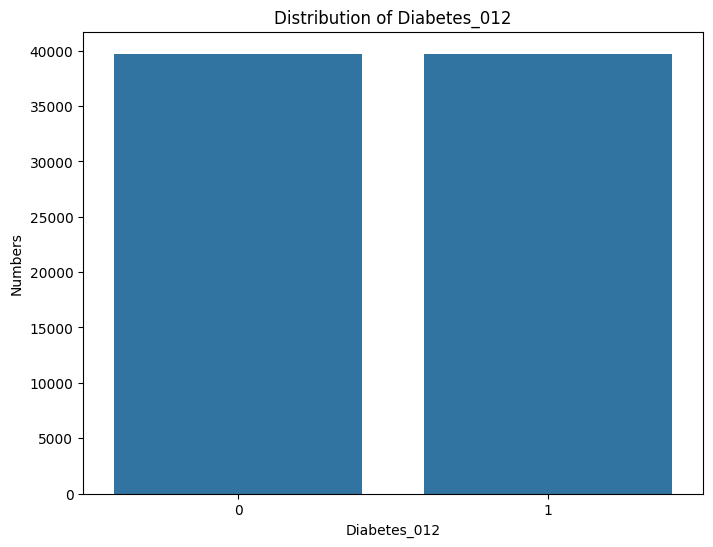

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=reasmpled_data)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Diabetes_012')
plt.ylabel('Numbers')
plt.title('Distribution of Diabetes_012')
plt.show()

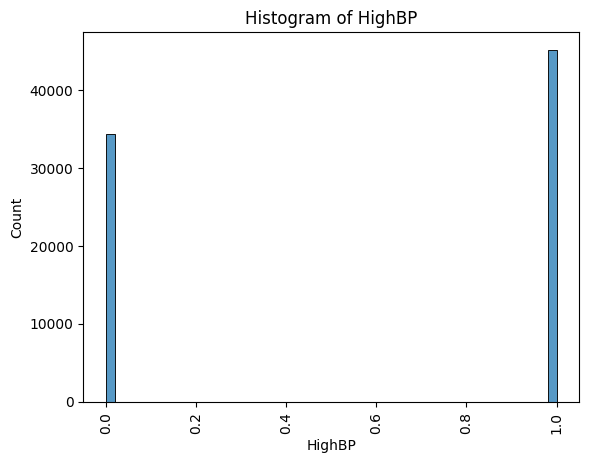

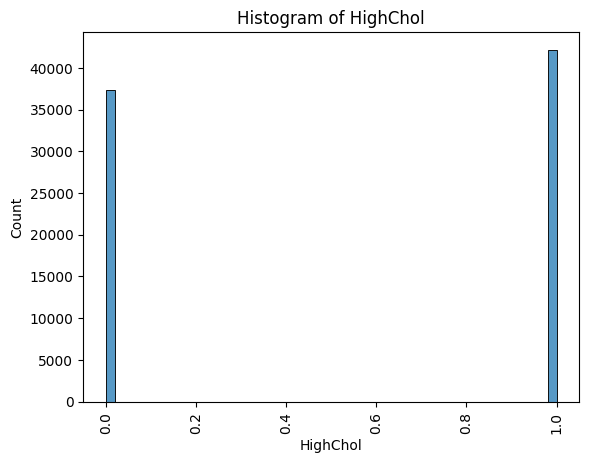

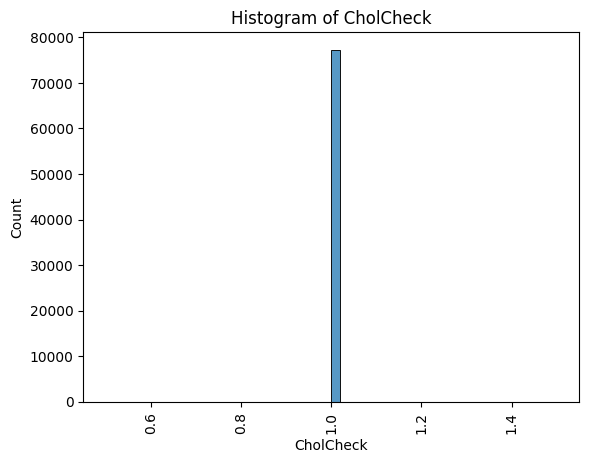

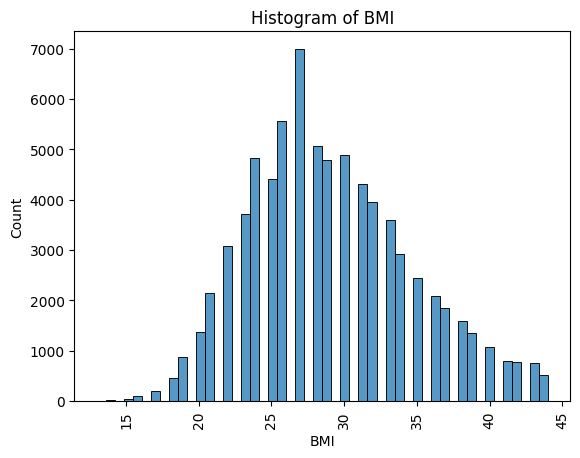

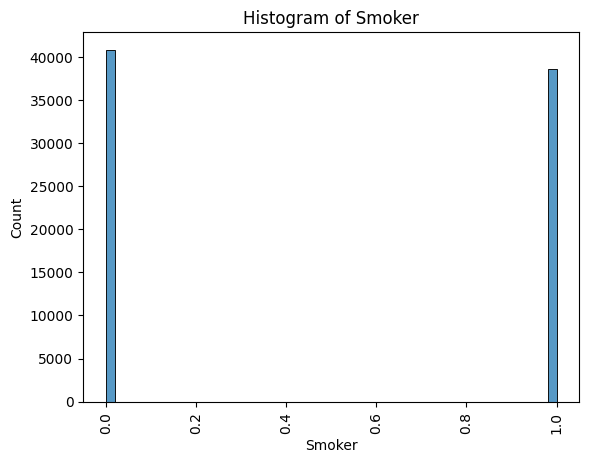

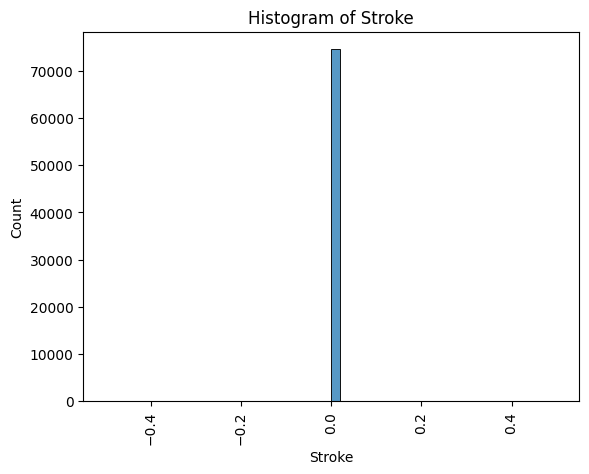

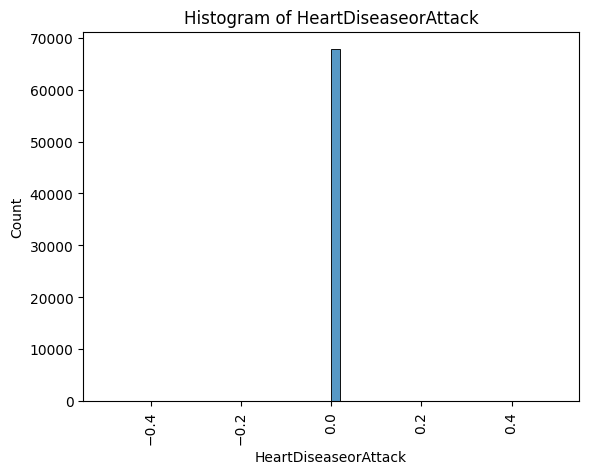

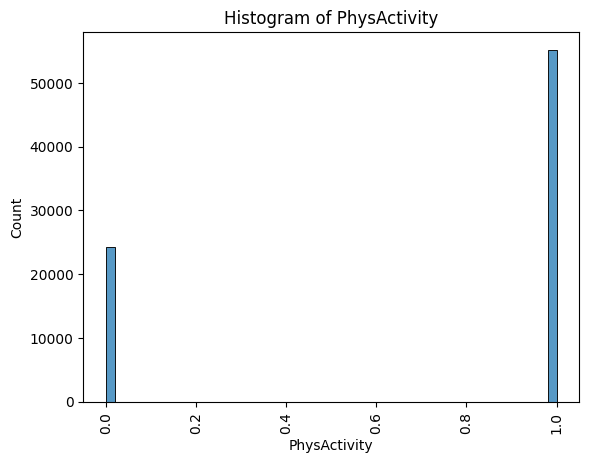

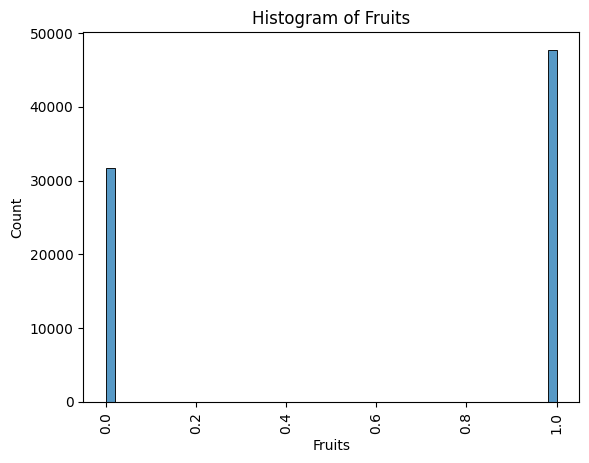

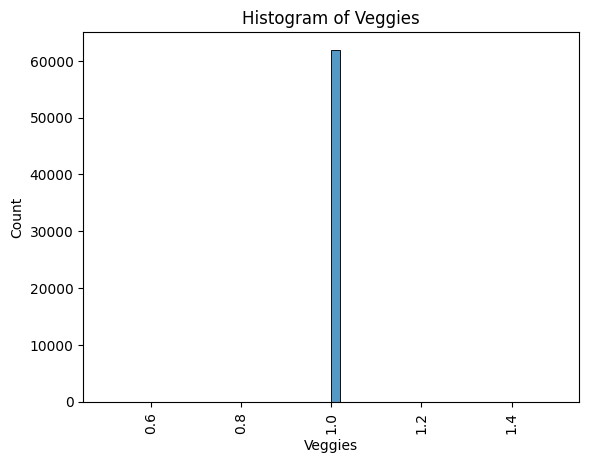

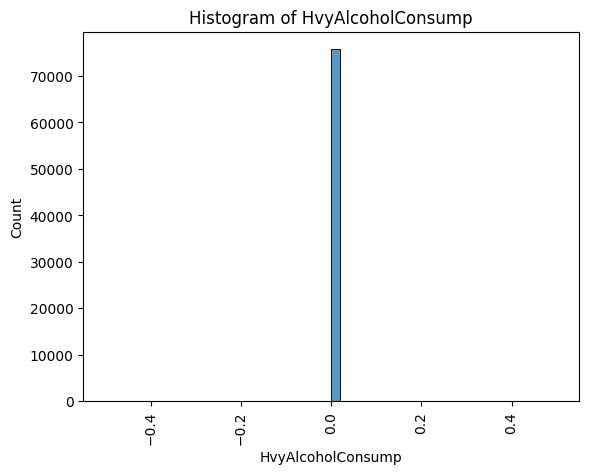

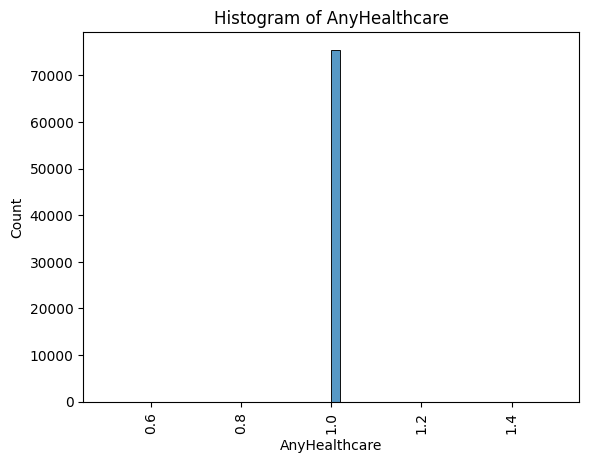

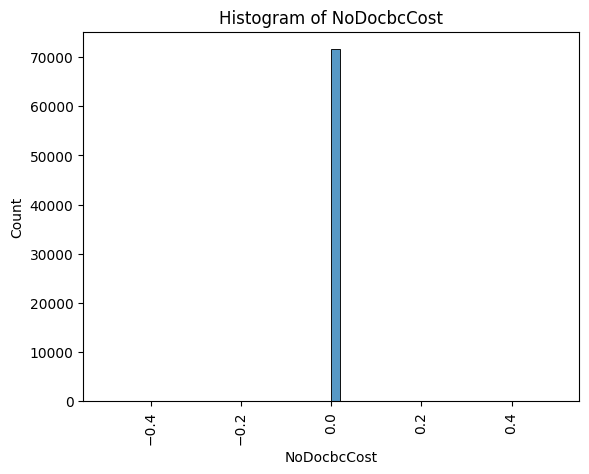

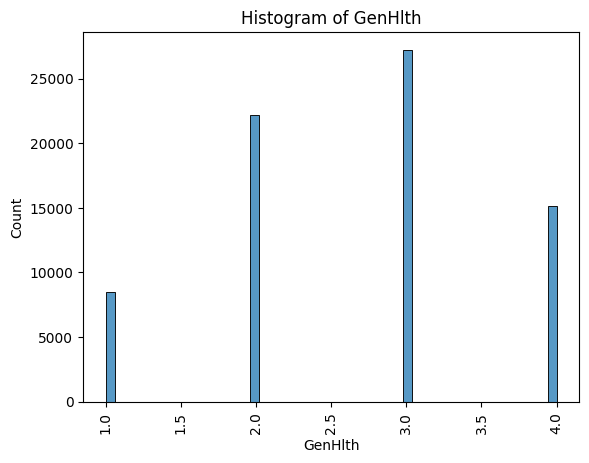

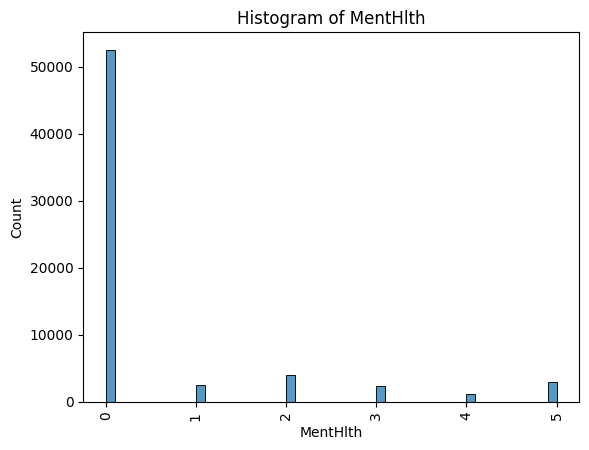

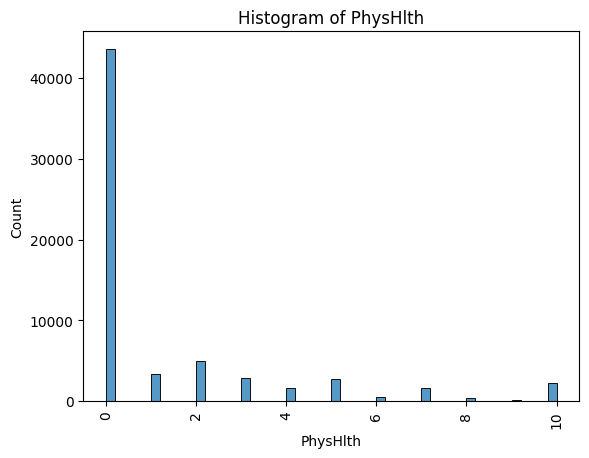

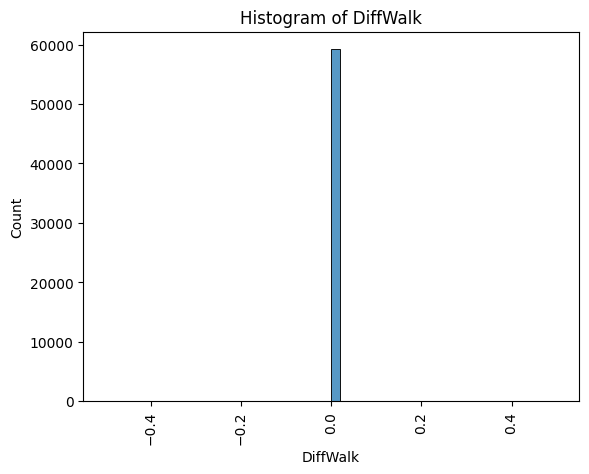

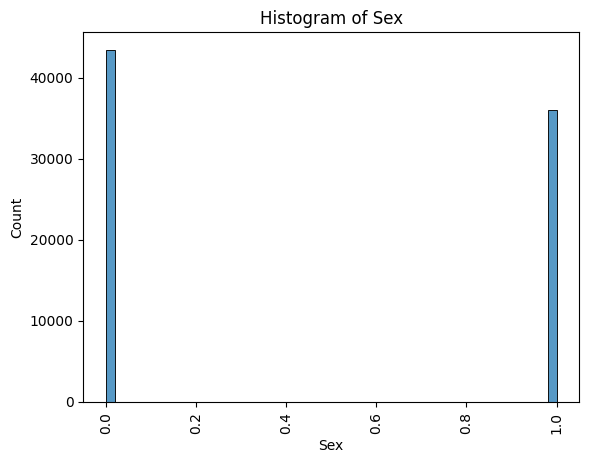

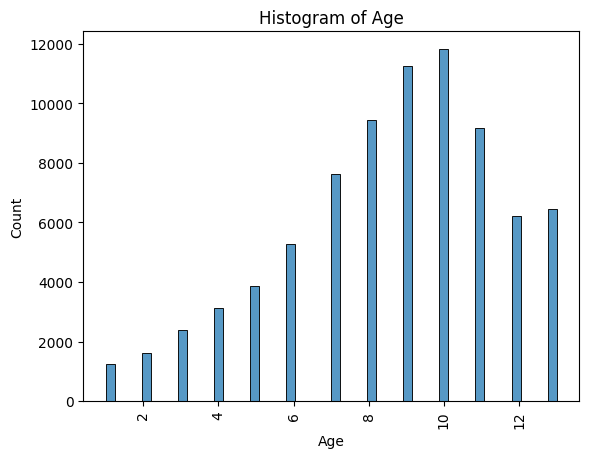

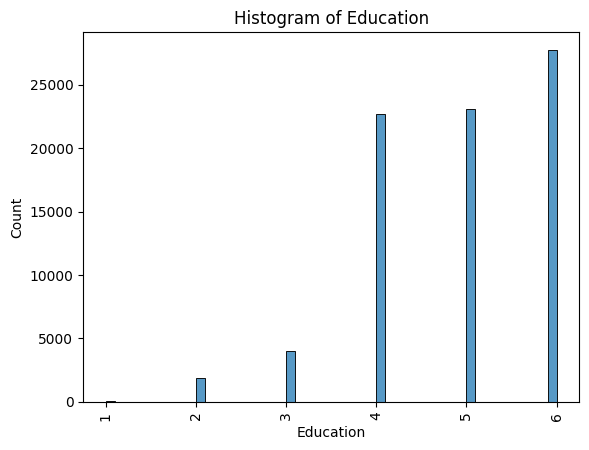

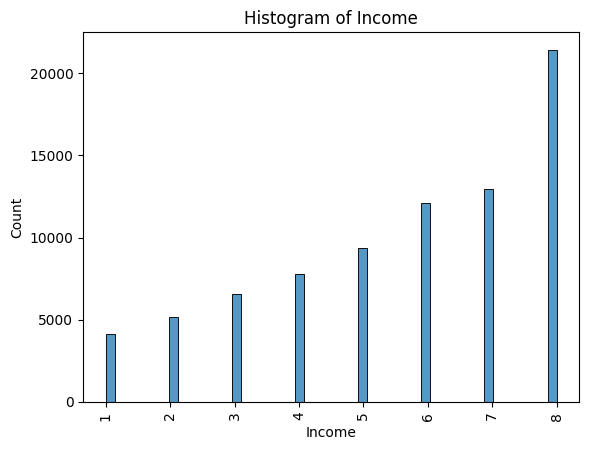

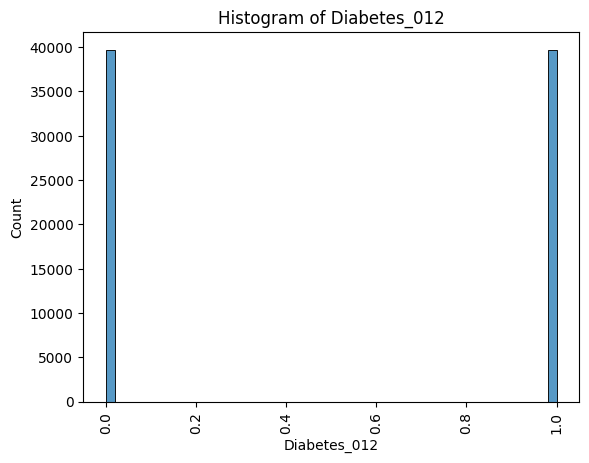

In [ ]:
for col in reasmpled_data.columns:
    sns.histplot(reasmpled_data[col], bins=50, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

#Features Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold, chi2, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
feature_names = x.columns
# Standardize the features (required for some techniques)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

* Information Gain (Mutual Information)


In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression

# Assuming 'x' is your DataFrame
# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # Or choose another strategy
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Now use the imputed data for mutual_info_regression
mi_scores = mutual_info_regression(x_imputed, y)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores.sort_values(ascending=False, inplace=True)


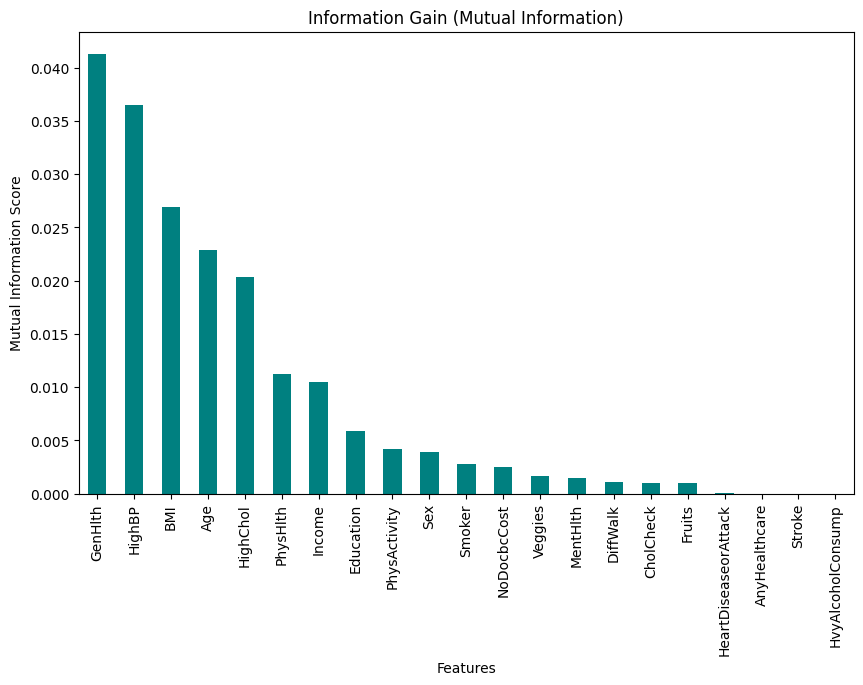

In [ ]:
# Plot Information Gain
plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

The output represents the Mutual Information for each feature in a dataset with two features.


Higher Mutual Information values suggest a stronger relationship or dependency between the features and the target variable.

* Chi-square Test (For Classification Only)

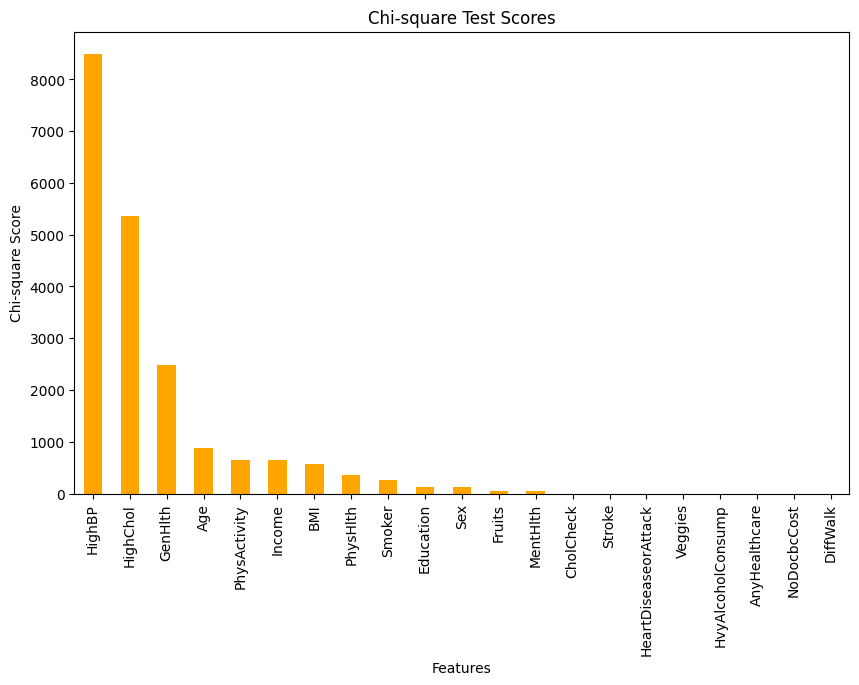

In [ ]:
# Scale features to a non-negative range using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(x)

# Binarize the target variable for classification
y_bin = np.where(y > np.median(y), 1, 0)  # Convert to binary classification

X_non_negative = imputer.fit_transform(X_non_negative)


# Compute Chi-square scores
chi2_scores, _ = chi2(X_non_negative, y_bin)
chi2_scores = pd.Series(chi2_scores, index=feature_names)
chi2_scores.sort_values(ascending=False, inplace=True)

# Plot Chi-square Scores
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind="bar", color="orange")
plt.title("Chi-square Test Scores")
plt.xlabel("Features")
plt.ylabel("Chi-square Score")
plt.show()

MedInc has a very high Chi-square score, meaning it has the strongest relationship with the target variable.

* Fisher’s Score (For Classification Only)


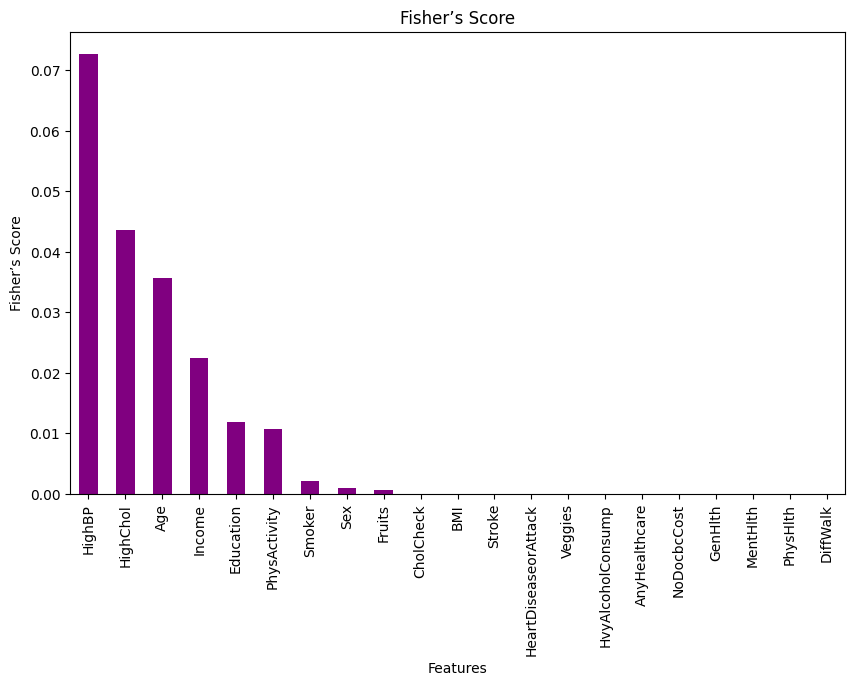

In [ ]:
# Fisher’s Score is not directly available in scikit-learn, so we'll implement it manually.
def fisher_score(x, y):
    classes = np.unique(y)
    overall_mean = np.mean(x, axis=0)
    between_var = np.zeros(x.shape[1])
    within_var = np.zeros(x.shape[1])

    for c in classes:
        X_c = x[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        between_var += n_c * (mean_c - overall_mean) ** 2
        within_var += np.sum((X_c - mean_c) ** 2, axis=0)

    fisher_scores = between_var / within_var
    return fisher_scores

fisher_scores = fisher_score(X_scaled, y_bin)  # Using binarized target
fisher_scores = pd.Series(fisher_scores, index=feature_names)
fisher_scores.sort_values(ascending=False, inplace=True)

# Plot Fisher’s Scores
plt.figure(figsize=(10, 6))
fisher_scores.plot(kind="bar", color="purple")
plt.title("Fisher’s Score")
plt.xlabel("Features")
plt.ylabel("Fisher’s Score")
plt.show()

* Correlation Coefficient

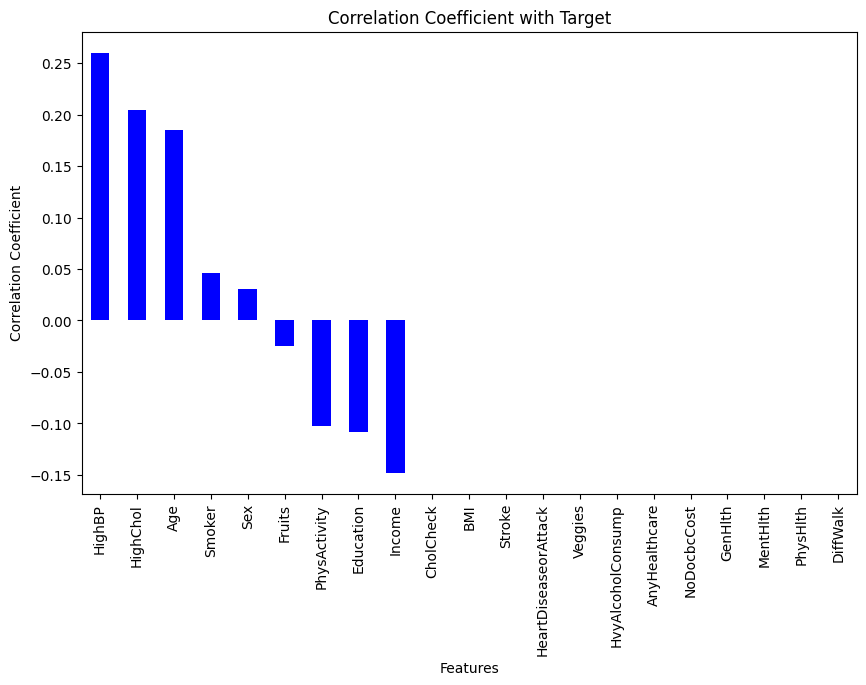

In [ ]:
# Correlation Coefficient
corr_scores = np.corrcoef(x.T, y)[-1, :-1]  # Correlation with target
corr_scores = pd.Series(corr_scores, index=feature_names)
corr_scores.sort_values(ascending=False, inplace=True)

# Plot Correlation Coefficients
plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

* Variance Threshold


In [ ]:
# Variance Threshold
variance_threshold = VarianceThreshold(threshold=0.1)  # Remove low-variance features
X_variance_selected = variance_threshold.fit_transform(x)

# Get selected features
selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", [feature_names[i] for i in selected_features])

Selected Features (Variance Threshold): ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']


* ANOVA (F-test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 2  5  6  9 10 11 12 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


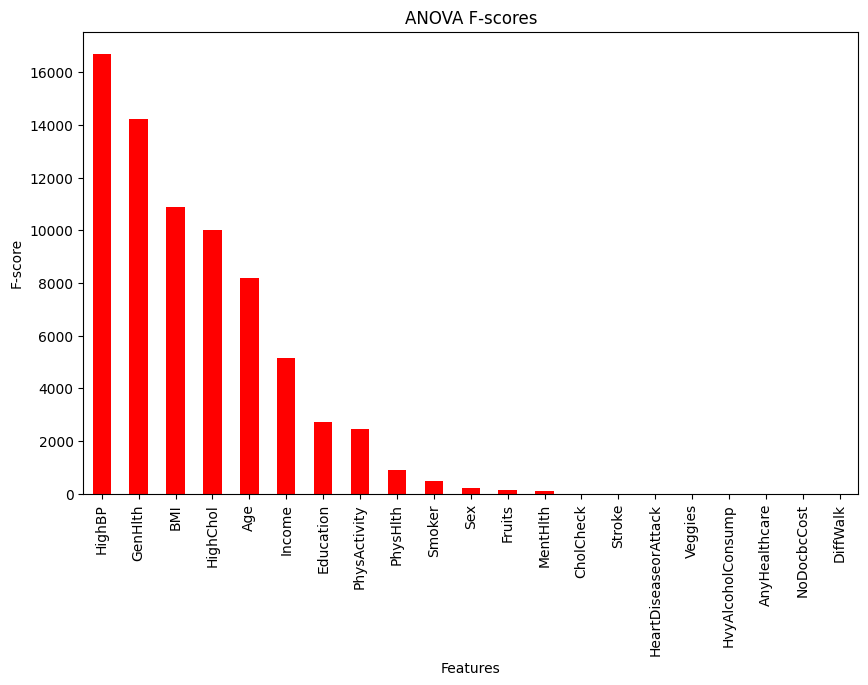

In [ ]:
# ANOVA (F-test)
f_scores, _ = f_classif(x_imputed, y)  # ANOVA F-test
f_scores = pd.Series(f_scores, index=feature_names)
f_scores.sort_values(ascending=False, inplace=True)

# Plot ANOVA F-scores
plt.figure(figsize=(10, 6))
f_scores.plot(kind="bar", color="red")
plt.title("ANOVA F-scores")
plt.xlabel("Features")
plt.ylabel("F-score")
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=10)
selector = selector.fit(x_imputed, y)



In [ ]:
selected_features = x.columns[selector.support_]
print("Top Features Selected by RFE:")
print(selected_features)


Top Features Selected by RFE:
Index(['HighBP', 'HighChol', 'CholCheck', 'PhysActivity', 'Veggies',
       'AnyHealthcare', 'GenHlth', 'Sex', 'Age', 'Income'],
      dtype='object')


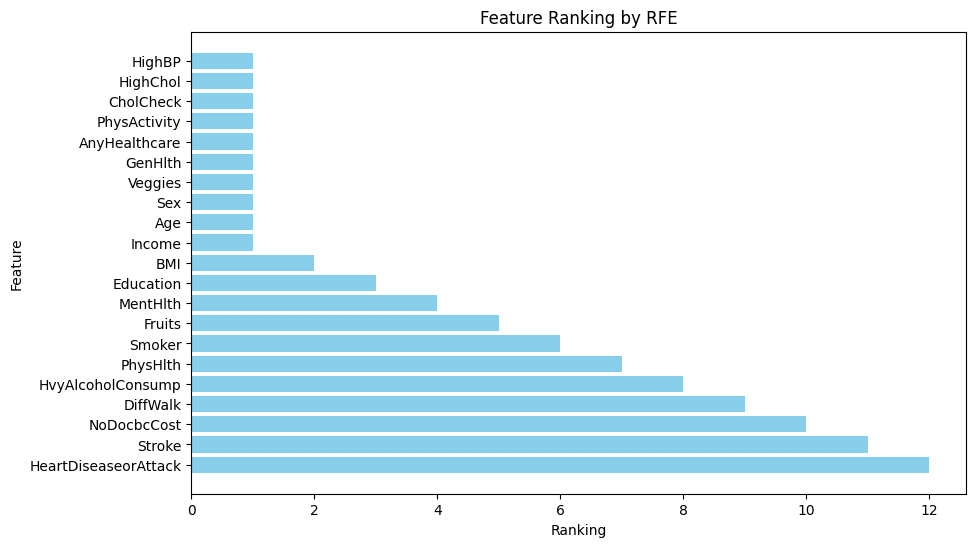

In [ ]:
# Get the ranking of features from RFE
feature_ranking = selector.ranking_
feature_names = x.columns

# Create a DataFrame for better visualization
ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking
ranking_df = ranking_df.sort_values('Ranking')

# Plot the feature rankings
plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Feature'], ranking_df['Ranking'], color='skyblue')
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.title("Feature Ranking by RFE")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# Random forst

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
target_column = 'Diabetes_012'
X = df.drop(target_column, axis=1)
y = df[target_column]
if y.dtype == 'object' or y.nunique() <= 10:
    le = LabelEncoder()
    y = le.fit_transform(y)
# Feature selection using SelectKBest
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X,y)
selected_features = X.columns[selector.get_support()]
print(f"Top {k} selected features:\n", selected_features)

Top 10 selected features:
 Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Using Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=60, max_depth=20, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {acc_rf:.4f}")

Random Forest Classifier Accuracy: 0.8250


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     38116
           1       0.47      0.23      0.31      7841

    accuracy                           0.83     45957
   macro avg       0.67      0.59      0.60     45957
weighted avg       0.79      0.83      0.80     45957



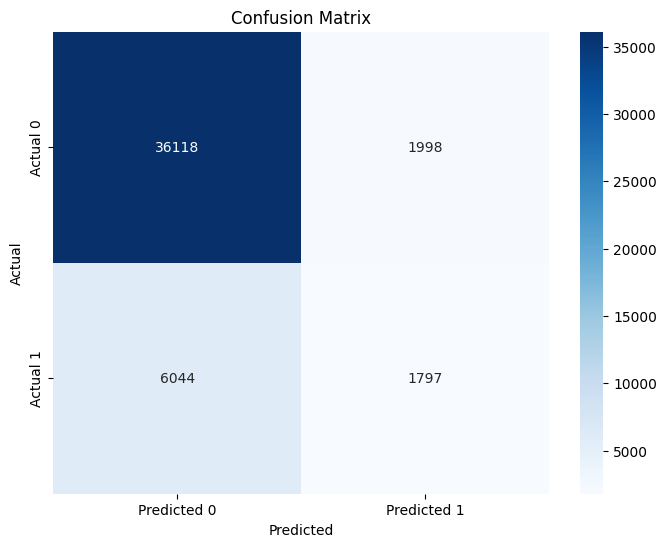

In [ ]:
print(classification_report(y_test, y_pred_rf))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=93f79812e06a57bc5c429e3462b11c8117c2b9e438d3215f2d51bebf28e387b7
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=60, max_depth=20, random_state=42)
rf_clf.fit(X_train, y_train)

# Explain with LIME
import lime
import lime.lime_tabular
feature_names = X.columns
class_names = ['0', '1']
X_numpy = X_selected
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_numpy,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

# Explain the first instance
exp = explainer.explain_instance(X_numpy[0], rf_clf.predict_proba, num_features=4)
exp.show_in_notebook()  # Shows feature importance